# Set-up

### Packages

In [1]:
import pandas as pd # Dataframes and Manipulation
from tqdm import tqdm # Timing for Loops
import matplotlib.pyplot as plt # Plots
from scipy.stats import ttest_ind # T Tests
from scipy.stats import ttest_1samp # More T Tests
from locale import setlocale, LC_TIME # Swedish time/date system
import numpy as np # Arrays for Plotting

### Load Data

In [3]:
# Load Timeline Data
timeline_data = pd.read_csv("timeline_context_data.csv")

In [4]:
# Load Sentiment Data Chunks
data_chunk_aa = pd.read_csv("classified_chunk_aa.csv")
data_chunk_ab = pd.read_csv("classified_chunk_ab.csv")
data_chunk_ac = pd.read_csv("classified_chunk_ac.csv")
data_chunk_ad = pd.read_csv("classified_chunk_ad.csv")

In [5]:
# Merge Sentiment Data Chunks
data_all = pd.concat([data_chunk_aa, data_chunk_ab, data_chunk_ac, data_chunk_ad], ignore_index=True)

In [6]:
# Load Lost Data
lost1 = pd.read_csv("part1.csv")
lost2 = pd.read_csv("part2.csv")
lost3 = pd.read_csv("part3.csv")

In [8]:
all_lost_data = pd.concat([lost1, lost2, lost3], ignore_index=True)

### Check Data

In [7]:
data_all

,Unnamed: 0,ID,Date,Fear Class 0 Probability,Fear Class 1 Probability,Fear Class 2 Probability,Violence Class 0 Probability,Violence Class 1 Probability,Violence Class 2 Probability,Document Type,...,Text,PDF Indicator,Content Page,PDF Link,Fear Class 0 Probability_2,Fear Class 1 Probability_2,Fear Class 2 Probability_2,Violence Class 0 Probability_2,Violence Class 1 Probability_2,Violence Class 2 Probability_2
0,0,0,02 november 2023,0.917277,0.076140,0.006583,0.996119,0.001370,0.002511,Remiss,...,2023 -04-26 U2023/01467 ...,1,https://www.regeringen.se/remisser/2023/11/inb...,https://www.regeringen.se/contentassets/c9981c...,0.976913,0.018334,0.004753,0.996448,0.001466,0.002086
1,1,1,10 november 2023,0.972475,0.024549,0.002975,0.999160,0.000354,0.000486,Regeringsuppdrag,...,...,1,https://www.regeringen.se/regeringsuppdrag/202...,https://www.regeringen.se/contentassets/f0bce7...,0.943017,0.040467,0.016517,0.996085,0.002019,0.001896
2,2,2,27 juni 2023,0.996270,0.002704,0.001027,0.998764,0.000592,0.000644,Remiss,...,Remiss 2023 -06-27 A2023/00885 ...,1,https://www.regeringen.se/remisser/2023/06/rem...,https://www.regeringen.se/contentassets/18dbd3...,0.985671,0.010385,0.003944,0.996642,0.001547,0.001811
3,3,3,08 september 2023,0.995365,0.003028,0.001607,0.998342,0.000822,0.000836,Remiss,...,Remiss 2023 -09-08 Fö2023/ 01488 ...,1,https://www.regeringen.se/remisser/2023/09/rem...,https://www.regeringen.se/contentassets/b73362...,0.990124,0.007137,0.002739,0.997457,0.001298,0.001245
4,4,4,07 juli 2023,0.996650,0.002474,0.000877,0.998282,0.000872,0.000846,Remiss,...,Remiss 2023 -07-07 S2023/02226 R...,1,https://www.regeringen.se/remisser/2023/07/rem...,https://www.regeringen.se/contentassets/2fc8df...,0.984264,0.011229,0.004507,0.997125,0.001188,0.001687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22291,3479,22603,01 januari 2000,0.961660,0.035484,0.002856,0.995944,0.001706,0.002350,"Lagrådsremiss,Rättsliga dokument",...,1Lagrådsremiss Ändringar i handläggningen av u...,1,https://www.regeringen.se/rattsliga-dokument/l...,https://www.regeringen.se/contentassets/7d45bb...,0.983393,0.011558,0.005049,0.993641,0.002334,0.004025
22292,3480,22604,01 januari 2004,0.959946,0.035239,0.004815,0.995180,0.001613,0.003207,"Lagrådsremiss,Rättsliga dokument",...,1 Lagrådsremiss Europarådets straffrätts...,1,https://www.regeringen.se/rattsliga-dokument/l...,https://www.regeringen.se/contentassets/d427a0...,0.987291,0.009088,0.003621,0.996256,0.001318,0.002425
22293,3481,22605,05 februari 2004,0.988481,0.009033,0.002486,0.996636,0.001008,0.002355,"Lagrådsremiss,Rättsliga dokument",...,1 Lagrådsremiss Bostadsrätt – underrätte...,1,https://www.regeringen.se/rattsliga-dokument/l...,https://www.regeringen.se/contentassets/ad2ee3...,0.978242,0.015954,0.005804,0.994935,0.002116,0.002949
22294,3482,22606,05 februari 2004,0.991349,0.007395,0.001257,0.988537,0.001774,0.009690,"Lagrådsremiss,Rättsliga dokument",...,1 Lagrådsremiss Inteckningsfrihet vi...,1,https://www.regeringen.se/rattsliga-dokument/l...,https://www.regeringen.se/contentassets/bfbf98...,0.989268,0.007444,0.003287,0.997096,0.001051,0.001853


In [8]:
all_lost_data

,ID,Date,Fear Class 0 Probability,Fear Class 1 Probability,Fear Class 2 Probability,Violence Class 0 Probability,Violence Class 1 Probability,Violence Class 2 Probability,Document Type,Source,Text,PDF Indicator,Content Page,PDF Link,Fear Class 0 Probability_2,Fear Class 1 Probability_2,Fear Class 2 Probability_2,Violence Class 0 Probability_2,Violence Class 1 Probability_2,Violence Class 2 Probability_2
0,22785,2010-01-26,0.919389,0.071883,0.008728,0.936438,0.021069,0.042493,"Lagrådsremiss,Rättsliga dokument",Justitiedepartementet,Lagrådsremiss 1 En ny fängelse- och hä...,1,https://www.regeringen.se/rattsliga-dokument/l...,https://www.regeringen.se/contentassets/3f4a77...,0.978813,0.015010,0.006177,0.995772,0.001584,0.002645
1,22786,2010-01-28,0.932965,0.058565,0.008470,0.986800,0.007919,0.005282,"Lagrådsremiss,Rättsliga dokument",Justitiedepartementet,Lagrådsremiss 1 Skärpta straff för all...,1,https://www.regeringen.se/rattsliga-dokument/l...,https://www.regeringen.se/contentassets/1eb29c...,0.982452,0.011767,0.005781,0.993685,0.002356,0.003959
2,22787,2010-01-29,0.680175,0.202579,0.117246,0.767078,0.011454,0.221467,"Lagrådsremiss,Rättsliga dokument",Justitiedepartementet,Lagrådsremiss 1 Genomförande av delar ...,1,https://www.regeringen.se/rattsliga-dokument/l...,https://www.regeringen.se/contentassets/6dcf49...,0.984556,0.011273,0.004171,0.996596,0.001385,0.002019
3,22788,2010-01-29,0.819321,0.087004,0.093676,0.993650,0.003267,0.003083,"Lagrådsremiss,Rättsliga dokument",Justitiedepartementet,Lagrådsremiss 1 Obehöriga transaktione...,1,https://www.regeringen.se/rattsliga-dokument/l...,https://www.regeringen.se/contentassets/7c4806...,0.989199,0.007611,0.003189,0.996607,0.001314,0.002080
4,22789,2010-01-29,0.879257,0.116284,0.004460,0.970832,0.007525,0.021643,"Lagrådsremiss,Rättsliga dokument",Justitiedepartementet,Lagrådsremiss 1 Ny varumärkeslag och ä...,1,https://www.regeringen.se/rattsliga-dokument/l...,https://www.regeringen.se/contentassets/aa1001...,0.970647,0.018621,0.010732,0.997644,0.000988,0.001368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,25097,2010-10-14,0.986507,0.011598,0.001894,0.995839,0.001434,0.002726,"Lagrådsremiss,Rättsliga dokument",Finansdepartementet,Lagrådsremiss Förfaranderegler för altern...,1,https://www.regeringen.se/rattsliga-dokument/l...,https://www.regeringen.se/contentassets/b9bc47...,0.988581,0.007922,0.003496,0.996288,0.001471,0.002241
796,25098,2010-10-15,0.987704,0.010358,0.001938,0.994348,0.002070,0.003582,"Lagrådsremiss,Rättsliga dokument",Finansdepartementet,Lagrådsremiss 1 Vissa tekniska mervärdessk...,1,https://www.regeringen.se/rattsliga-dokument/l...,https://www.regeringen.se/contentassets/93766c...,0.988235,0.008384,0.003382,0.997186,0.001197,0.001617
797,25099,2010-11-11,0.987210,0.011505,0.001284,0.997094,0.000960,0.001946,"Lagrådsremiss,Rättsliga dokument",Finansdepartementet,Lagrådsremiss 1 Ändrade bestämmelser o...,1,https://www.regeringen.se/rattsliga-dokument/l...,https://www.regeringen.se/contentassets/4b4015...,0.984703,0.010831,0.004466,0.997005,0.001206,0.001789
798,25100,2010-11-19,0.978293,0.017912,0.003796,0.995808,0.001422,0.002770,"Lagrådsremiss,Rättsliga dokument",Finansdepartementet,Lagrådsremiss 1 Skattefrihet för alkol...,1,https://www.regeringen.se/rattsliga-dokument/l...,https://www.regeringen.se/contentassets/667b17...,0.988969,0.007676,0.003355,0.995607,0.001699,0.002695


# Sentiment Dates

In [9]:
# Set the locale to Swedish time
setlocale(LC_TIME, 'sv_SE')

'sv_SE'

In [10]:
# Convert the 'Date' column to datetime format with Swedish locale
data_all['Date'] = pd.to_datetime(data_all['Date'], format='%d %B %Y')

In [11]:
# Create new columns for day, month, and year
data_all['Day'] = data_all['Date'].dt.day.fillna(0).astype(int)
data_all['Month'] = data_all['Date'].dt.month.fillna(0).astype(int)
data_all['Year'] = data_all['Date'].dt.year.fillna(0).astype(int)

In [12]:
# Convert the 'Date' column to datetime format with Swedish locale
all_lost_data['Date'] = pd.to_datetime(all_lost_data['Date'], format='%Y-%m-%d')

In [13]:
# Create new columns for day, month, and year
all_lost_data['Day'] = all_lost_data['Date'].dt.day.fillna(0).astype(int)
all_lost_data['Month'] = all_lost_data['Date'].dt.month.fillna(0).astype(int)
all_lost_data['Year'] = all_lost_data['Date'].dt.year.fillna(0).astype(int)

# Create a Dataset Combining All Data and Lost Data

In [14]:
# Remove 'Unnamed: 0" Column from data_all
data_all.drop('Unnamed: 0', axis = 1, inplace = True)

In [15]:
# Perform an inner join on the 'ID' column
combined_data = pd.merge(all_lost_data, data_all, how='outer', on='ID')

In [96]:
# Filter the DataFrame for years since 2012
filtered_data = pd.concat([data_all, all_lost_data], ignore_index=True)

In [97]:
len(data_all['Year'] >= 2010)

22296

In [98]:
len(all_lost_data['Year'] >= 2010)

800

In [99]:
len(filtered_data)

23096

In [94]:
# Only want data from 2010 on
# filtered_data = filtered_data[filtered_data['Year'] >= 2010].reset_index(drop=True)

In [100]:
# Check Data
filtered_data

,ID,Date,Fear Class 0 Probability,Fear Class 1 Probability,Fear Class 2 Probability,Violence Class 0 Probability,Violence Class 1 Probability,Violence Class 2 Probability,Document Type,Source,...,PDF Link,Fear Class 0 Probability_2,Fear Class 1 Probability_2,Fear Class 2 Probability_2,Violence Class 0 Probability_2,Violence Class 1 Probability_2,Violence Class 2 Probability_2,Day,Month,Year
0,0,2023-11-02,0.917277,0.076140,0.006583,0.996119,0.001370,0.002511,Remiss,Utbildningsdepartementet,...,https://www.regeringen.se/contentassets/c9981c...,0.976913,0.018334,0.004753,0.996448,0.001466,0.002086,2,11,2023
1,1,2023-11-10,0.972475,0.024549,0.002975,0.999160,0.000354,0.000486,Regeringsuppdrag,"Klimat- och näringslivsdepartementet,Regeringen",...,https://www.regeringen.se/contentassets/f0bce7...,0.943017,0.040467,0.016517,0.996085,0.002019,0.001896,10,11,2023
2,2,2023-06-27,0.996270,0.002704,0.001027,0.998764,0.000592,0.000644,Remiss,Arbetsmarknadsdepartementet,...,https://www.regeringen.se/contentassets/18dbd3...,0.985671,0.010385,0.003944,0.996642,0.001547,0.001811,27,6,2023
3,3,2023-09-08,0.995365,0.003028,0.001607,0.998342,0.000822,0.000836,Remiss,Försvarsdepartementet,...,https://www.regeringen.se/contentassets/b73362...,0.990124,0.007137,0.002739,0.997457,0.001298,0.001245,8,9,2023
4,4,2023-07-07,0.996650,0.002474,0.000877,0.998282,0.000872,0.000846,Remiss,Socialdepartementet,...,https://www.regeringen.se/contentassets/2fc8df...,0.984264,0.011229,0.004507,0.997125,0.001188,0.001687,7,7,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23091,25097,2010-10-14,0.986507,0.011598,0.001894,0.995839,0.001434,0.002726,"Lagrådsremiss,Rättsliga dokument",Finansdepartementet,...,https://www.regeringen.se/contentassets/b9bc47...,0.988581,0.007922,0.003496,0.996288,0.001471,0.002241,14,10,2010
23092,25098,2010-10-15,0.987704,0.010358,0.001938,0.994348,0.002070,0.003582,"Lagrådsremiss,Rättsliga dokument",Finansdepartementet,...,https://www.regeringen.se/contentassets/93766c...,0.988235,0.008384,0.003382,0.997186,0.001197,0.001617,15,10,2010
23093,25099,2010-11-11,0.987210,0.011505,0.001284,0.997094,0.000960,0.001946,"Lagrådsremiss,Rättsliga dokument",Finansdepartementet,...,https://www.regeringen.se/contentassets/4b4015...,0.984703,0.010831,0.004466,0.997005,0.001206,0.001789,11,11,2010
23094,25100,2010-11-19,0.978293,0.017912,0.003796,0.995808,0.001422,0.002770,"Lagrådsremiss,Rättsliga dokument",Finansdepartementet,...,https://www.regeringen.se/contentassets/667b17...,0.988969,0.007676,0.003355,0.995607,0.001699,0.002695,19,11,2010


# Timeline Data Cleaning and Organization

### Remove Excess/Old Data

In [101]:
# Remove any data before 2010
timeline_data = timeline_data[timeline_data['Year'] >= 2010]

### Shorten Column Names

In [102]:
timeline_data = timeline_data.rename(columns={
    "Proportion of Documents Covering Immigration": "Proportion of Docs Immigration-Related",
    "Average Annual Disposable Income of Households": "Avg Household Disp. Income",
    "Disparity in the Share of Youth Not in Education, Employment, or Training by Broad Group of Country of Birth, Foreign-born minus Swedish-born ": "Disparity in Youth NEET Rate",
    "Disparity in the Share of People Leaving Early from Education and Training by Broad Group of Country of Birth, Foreign-born minus Swedish-born": "Disparity in Leaving Education Rate",
    "Disparity in the Rate of People at Risk of Poverty or Social Exclusion by Country of Birth, Non-EU minus Sweden": "Disparity in Poverty & Exclusion Risk Rate",
    "Disparity in Average Annual Disposable Income by Region of birth, Sweden minus Africa": "Disparity in Avg. Disp. Income vs Africa",
    "Disparity in Average Annual Disposable Income by Region of birth, Sweden minus Asia": "Disparity in Avg. Disp. Income vs Asia",
    "Number of Lethal Violence Deaths": "Lethal Violence Deaths",
    "Number of Reported Cases of Sexual Offences by Type": "Reported Cases of Sexual Offences",
    "Number of People Prosecuted for Use of Deadly Force (Convictions with Murder or Manslaughter as the Main Crime)": "People Prosecuted for Deadly Force",
    "Number of Work Permits Granted": "Work Permits Granted",
    "Number of Granted Student Residence Permits": "Granted Student Residence Permits",
    "Percent of Swedish Population with Foreign Background": "% Swedish Pop. w Foreign Back."
})

### Create per-100,000 Crime Statistics

In [103]:
# Add a per-capita statistic for law and order metrics
timeline_data['Lethal Violence Deaths per 100,000'] = (timeline_data['Lethal Violence Deaths'] / timeline_data['Swedish Population']) * 100000
timeline_data['Reported Cases of Sexual Offences per 100,000'] = (timeline_data['Reported Cases of Sexual Offences'] / timeline_data['Swedish Population']) * 100000
timeline_data['People Prosecuted for Deadly Force per 100,000'] = (timeline_data['People Prosecuted for Deadly Force'] / timeline_data['Swedish Population']) * 100000

# Sentiment Data Keyword Identification

### Define Keywords

In [4]:
# Combined list of Swedish words related to immigration, integration, assimilation, Middle Eastern cultures, and languages
keywords = [
    "Invandring", "Migrationspolitik", "Asylsökande", "Flyktingar", "Immigrant", "Utvandring",
    "Integration", "Integrationspolitik", "Mångkultur", "Integrationstjänster", "Integrationssvårigheter", "Integrationsprocess",
    "Assimilation", "Anpassning", "Kulturell assimilering", "Kulturell anpassning", "Språklig assimilering", "Social assimilering",
    "Arabisk", "Syrisk", "Irakisk", "Iransk", "Palestinsk", "Libanesisk", "Turkisk", "Kurdisk", "Persisk",
    "Araber", "Syrier", "Irakier", "Iranier", "Palestinier", "Libaneser", "Turkar", "Kurder"
]

# Additional words related to immigration, integration, refugees, migration, and assimilation
additional_keywords = [
    "Invandring", "Integration", "Flykting", "Asyl", "Migrationsverket", "Anhöriginvandring", "Utlänning", 
    "Samhällsintegration", "Språkundervisning", "Mångfald", "Tolerans", "Diskriminering", "Rasism", "Inkludering", 
    "Immigrationslagar", "Gränskontroll", "Upphållstillstånd", "Integrationspolitik", 
    "Skyddsbehövande", "Internflykting", "Utvisning", "Assimilering", "Återvandring", 
    "Anpassning", "Kulturkrock", "Etnicitet", "Terrorism", "Muslim", "Islam", "Segregation", "Assimilation",
    "Syrien", "Iran", "Turkiet", "Irak", "Palestina", "Libanon", "Mellanöstern"
]

# Remove duplicates and add additional_keywords to the original list
keywords = list(set(keywords + additional_keywords))

# Dictionary to store keyword frequencies
keyword_frequencies = {keyword: [] for keyword in keywords}

### Dummies for Keywords

In [105]:
# Create a Dataframe to Stand In Place for the Filtered Data df While I Search for Keywords
data_without_keywords = filtered_data.copy()

In [107]:
# Dummy variables indicating presence of each keyword in each document
# Duration: 36 min

# for keyword in tqdm(keywords, total = len(keywords), desc = "Searching for keywords"):
#     # Iterate through each keyword and check its presence in each text entry
#     keyword_occurrences = data_without_keywords['Text'].str.contains(keyword, case=False, na=False)
#     keyword_frequencies[keyword] = keyword_occurrences.astype(int)

# # Create a new DataFrame to store the keyword frequencies
# keyword_df = pd.DataFrame(keyword_frequencies)

# # Concatenate the keyword frequencies DataFrame with the original DataFrame
# data_with_keywords = pd.concat([data_without_keywords, keyword_df], axis=1)

Searching for keywords:   0%|          | 0/68 [00:00<?, ?it/s]

Searching for keywords: 100%|██████████| 68/68 [50:03<00:00, 44.16s/it] 


### Checkpoint: Save Data to CSV

In [108]:
# Save processed data to CSV
# data_with_keywords.to_csv('CHECKPOINT.csv', index=False)

In [2]:
# Read in data from checkpoint
data_with_keywords = pd.read_csv('CHECKPOINT.csv')

### Mark Articles That Have Any Keyword Present

In [5]:
# Check each row for the presence of any keywords; if one is there, make 'Keyword Present' into 1; otherwise make it 0
data_with_keywords['Keyword Present'] = data_with_keywords[keywords].any(axis=1).astype(int)

### List of Keywords Found in Each Article (If Any)

In [6]:
# Get the list of column names where the row value is 1 for each row and the column is in the list of keywords
data_with_keywords['Keywords Present'] = data_with_keywords.apply(lambda row: [col for col in keywords if row[col] == 1], axis=1)

# Check Data

In [7]:
# Double Check That Data is Only from 2010 On
data_with_keywords = data_with_keywords[data_with_keywords['Year'] >= 2010]

In [8]:
# View Data
data_with_keywords

,ID,Date,Fear Class 0 Probability,Fear Class 1 Probability,Fear Class 2 Probability,Violence Class 0 Probability,Violence Class 1 Probability,Violence Class 2 Probability,Document Type,Source,...,Syrier,Araber,Etnicitet,Skyddsbehövande,Iran,Libaneser,Integrationstjänster,Diskriminering,Keyword Present,Keywords Present
0,0,2023-11-02,0.917277,0.076140,0.006583,0.996119,0.001370,0.002511,Remiss,Utbildningsdepartementet,...,0,0,0,0,0,0,0,0,0,[]
1,1,2023-11-10,0.972475,0.024549,0.002975,0.999160,0.000354,0.000486,Regeringsuppdrag,"Klimat- och näringslivsdepartementet,Regeringen",...,0,0,0,0,0,0,0,0,0,[]
2,2,2023-06-27,0.996270,0.002704,0.001027,0.998764,0.000592,0.000644,Remiss,Arbetsmarknadsdepartementet,...,0,0,0,0,0,0,0,1,1,"[Integration, Segregation, Diskriminering, Mig..."
3,3,2023-09-08,0.995365,0.003028,0.001607,0.998342,0.000822,0.000836,Remiss,Försvarsdepartementet,...,0,0,0,0,0,0,0,0,0,[]
4,4,2023-07-07,0.996650,0.002474,0.000877,0.998282,0.000872,0.000846,Remiss,Socialdepartementet,...,0,0,0,0,0,0,0,0,1,[Migrationsverket]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23091,25097,2010-10-14,0.986507,0.011598,0.001894,0.995839,0.001434,0.002726,"Lagrådsremiss,Rättsliga dokument",Finansdepartementet,...,0,0,0,0,0,0,0,0,1,"[Anpassning, Gränskontroll]"
23092,25098,2010-10-15,0.987704,0.010358,0.001938,0.994348,0.002070,0.003582,"Lagrådsremiss,Rättsliga dokument",Finansdepartementet,...,0,0,0,0,0,0,0,0,1,[Anpassning]
23093,25099,2010-11-11,0.987210,0.011505,0.001284,0.997094,0.000960,0.001946,"Lagrådsremiss,Rättsliga dokument",Finansdepartementet,...,0,0,0,0,0,0,0,0,1,[Anpassning]
23094,25100,2010-11-19,0.978293,0.017912,0.003796,0.995808,0.001422,0.002770,"Lagrådsremiss,Rättsliga dokument",Finansdepartementet,...,0,0,0,0,0,0,0,0,1,[Anpassning]


# Calculate F-V Scores for Keyword-Marked Sentiment Data

### Rename F-V Probability Columns

In [9]:
# Rename F-V Probability Columns
data_with_keywords.rename(columns={
    'Fear Class 0 Probability_2': 'Fear 0 Comprehensive',
    'Fear Class 1 Probability_2': 'Fear 1 Comprehensive',
    'Fear Class 2 Probability_2': 'Fear 2 Comprehensive',
    'Violence Class 0 Probability_2': 'Violence 0 Comprehensive',
    'Violence Class 1 Probability_2': 'Violence 1 Comprehensive',
    'Violence Class 2 Probability_2': 'Violence 2 Comprehensive',
    'Fear Class 0 Probability': 'Fear 0 Composite',
    'Fear Class 1 Probability': 'Fear 1 Composite',
    'Fear Class 2 Probability': 'Fear 2 Composite',
    'Violence Class 0 Probability': 'Violence 0 Composite',
    'Violence Class 1 Probability': 'Violence 1 Composite',
    'Violence Class 2 Probability': 'Violence 2 Composite',
}, inplace=True)

### Calculate F-V Scores

In [10]:
# Create a Dataframe to Hold the Keyword-Labeled Data and FVS Scores
data_classified = data_with_keywords.copy()

In [11]:
# Calculate F-V Scores for Each Document
data_classified['Comprehensive FVS'] = (1 - ((data_classified['Fear 0 Comprehensive'] + data_classified['Violence 0 Comprehensive']) / 2)) * 100

# Calculate F-V Score for Each Document
data_classified['Composite FVS'] = (1 - ((data_classified['Fear 0 Composite'] + data_classified['Violence 0 Composite']) / 2)) * 100

### Remove Columns with 0 For 'Fear 0 Composite' or 'Fear 0 Comprehensive' Because This Was an Indicator in the Scraper for an Error in Processing and Sentiment Analysis

In [12]:
# Remove rows where 'Fear 0 Composite' or 'Fear 0 Comprehensive' is equal to 0
data_classified = data_classified[(data_classified['Fear 0 Composite'] != 0) & (data_classified['Fear 0 Comprehensive'] != 0)]

# Create Dataset for Analysis and Testing

### Create Dataframe

In [13]:
# Group by 'Keyword Present' and 'Year', calculate the mean for 'Article FVS' and the count of rows
data_aggregated = data_classified.groupby(['Keyword Present', 'Year']).agg({'Comprehensive FVS': 'mean', 'Year': 'count'}).rename(columns={'Year': 'Row_Count'}).reset_index()

### Aggregation of FVS Scores By Year and Topic

In [14]:
# Group by 'Keyword Present' and 'Year', calculate the mean for 'Article FVS' and the count of rows
data_aggregated = data_classified.groupby(['Keyword Present', 'Year']).agg({
    'Comprehensive FVS': 'mean',
    'Composite FVS': 'mean',  # Include mean aggregation for 'Composite FVS'
    'Year': 'count'
}).rename(columns={'Year': 'Row_Count'}).reset_index()

In [15]:
# Pivot the data to compare 'Comprehensive FVS' and 'Composite FVS' for each 'Keyword Present' group for each year
data_aggregated = data_aggregated.pivot_table(
    index='Year',
    columns='Keyword Present',
    values=['Comprehensive FVS', 'Composite FVS', 'Row_Count'],
    aggfunc={
        'Comprehensive FVS': 'mean',
        'Composite FVS': 'mean',
        'Row_Count': 'sum'
    }
).reset_index()

In [16]:
# Flatten the multi-level column index and rename the columns
data_aggregated.columns = [f'{col[0]}_{col[1]}' if col[1] != '' else col[0] for col in data_aggregated.columns]

### Calculate FVS Disparities Between Document Content By FVS Calculation Method

In [17]:
data_aggregated['Comprehensive FVS Disparity'] = data_aggregated['Comprehensive FVS_1'] - data_aggregated['Comprehensive FVS_0']
data_aggregated['Composite FVS Disparity'] = data_aggregated['Composite FVS_1'] - data_aggregated['Composite FVS_0']

### Calculate Proportion of Documents with Keywords Present by Year

In [18]:
# Calculate 'Prop.Docs Immigration-Related' and 'Total Documents'
data_aggregated['Total Documents'] = data_aggregated['Row_Count_1'] + data_aggregated['Row_Count_0']
data_aggregated['Proportion Immigration'] = data_aggregated['Row_Count_1'] / data_aggregated['Total Documents'] * 100

# Prepare Sentiment Data to Merge with Timeline Context Data

### Round Data for Neatness

In [19]:
# Round Decimal Places for Proportions and FVS-Related Metrics
decimal_points = {
    'Composite FVS_0': 3,
    'Composite FVS_1': 3,
    'Comprehensive FVS_0': 3,
    'Comprehensive FVS_1': 3,
    'Proportion Immigration': 1,
    'Comprehensive FVS Disparity': 3,
    'Composite FVS Disparity': 3
}

data_aggregated = data_aggregated.round(decimal_points)

### Rename Columns

In [20]:
# Define the new column names
new_column_names = {
    'Composite FVS_0': 'Composite FVS: Other',
    'Composite FVS_1': 'Composite FVS: Immigration',
    'Comprehensive FVS_0': 'Comprehensive FVS: Other',
    'Comprehensive FVS_1': 'Comprehensive FVS: Immigration',
    'Row_Count_0': 'Doc Count: Other',
    'Row_Count_1': 'Doc Count: Immigration',
    'Proportion Immigration': 'Prop. Docs Covering Immigration'
}

# Rename columns in the decade_data_summaries DataFrame
data_aggregated.rename(columns=new_column_names, inplace=True)

# Merge Sentiment and Timeline Context Data

### Merge Data

In [21]:
# Merge DataFrames on 'Year'
full_timeline_data = pd.merge(data_aggregated, timeline_data, on='Year', how='inner')

NameError: name 'timeline_data' is not defined

# Standardize Context Data

In [ ]:
# List of columns to standardize
columns_to_standardize = [
    'Prop. Docs Covering Immigration',
    'Unemployment Rate',
    'GDP Per Capita',
    'Avg Household Disp. Income',
    'Disparity in Youth NEET Rate',
    'Disparity in Leaving Education Rate',
    'Disparity in Poverty & Exclusion Risk Rate',
    'Disparity in Avg. Disp. Income vs Africa',
    'Disparity in Avg. Disp. Income vs Asia',
    'Lethal Violence Deaths',
    'Lethal Violence Deaths per 100,000',
    'Reported Cases of Sexual Offences',
    'Reported Cases of Sexual Offences per 100,000',
    'People Prosecuted for Deadly Force',
    'People Prosecuted for Deadly Force per 100,000',
    'Work Permits Granted',
    'Granted Student Residence Permits',
    '% Swedish Pop. w Foreign Back.',
    'Immigration to Sweden',
    'Swedish Population',
    'Immigration & Integration Importance Prop.',
    'Law & Order Importance Prop.',
    'Law & Order Importance Rank',
    'Immigration and Integration Importance Rank',
    'Social Democrats Vote Share',
    'Swedish Democrats Vote Share',
    'Moderate Party Vote Share',
    'Left Party Vote Share',
    'Centre Party Vote Share',
    'Christian Democrats Vote Share',
    'Green Party Vote Share',
    'Liberals Vote Share',
    'Others Vote Share',
    'Composite FVS: Other',
    'Composite FVS: Immigration',
    'Composite FVS Disparity',
    'Comprehensive FVS: Other',
    'Comprehensive FVS: Immigration',
    'Comprehensive FVS Disparity'
]

In [ ]:
# Add "Std." prefix to column names
std_column_names = ['Std. ' + col for col in columns_to_standardize]

In [ ]:
# Standardize columns
full_timeline_data[std_column_names] = (full_timeline_data[columns_to_standardize] - full_timeline_data[columns_to_standardize].mean()) / full_timeline_data[columns_to_standardize].std()

# Create Dataframes for Hypothesis Testing and Plotting

### Create Two Data Frames from the Merged Data--One for Testing (2012-2023 since that's when we have good explanatory variable data) and One for Plotting (2010-2023 since some of the interesting variables for plotting go back to 2010, but not most of them)

In [ ]:
# Testing Data (2012-2023)
testing_data = full_timeline_data.copy()
testing_data = testing_data[testing_data['Year'] >= 2012]

In [ ]:
# Plotting Data (2010-2023)
plotting_data = full_timeline_data.copy()
plotting_data = plotting_data[plotting_data['Year'] >= 2010]

### Download Plotting Data for the App

In [ ]:
# Save the DataFrame to a CSV file
# plotting_data.to_csv('plotting_data.csv', index=False)

# Timeline

### Identify Standardized Columns for Plotting

In [ ]:
# List of columns that start with "Std."
timeline_variables = plotting_data.filter(regex=r'^Std\.', axis=1).columns.tolist()

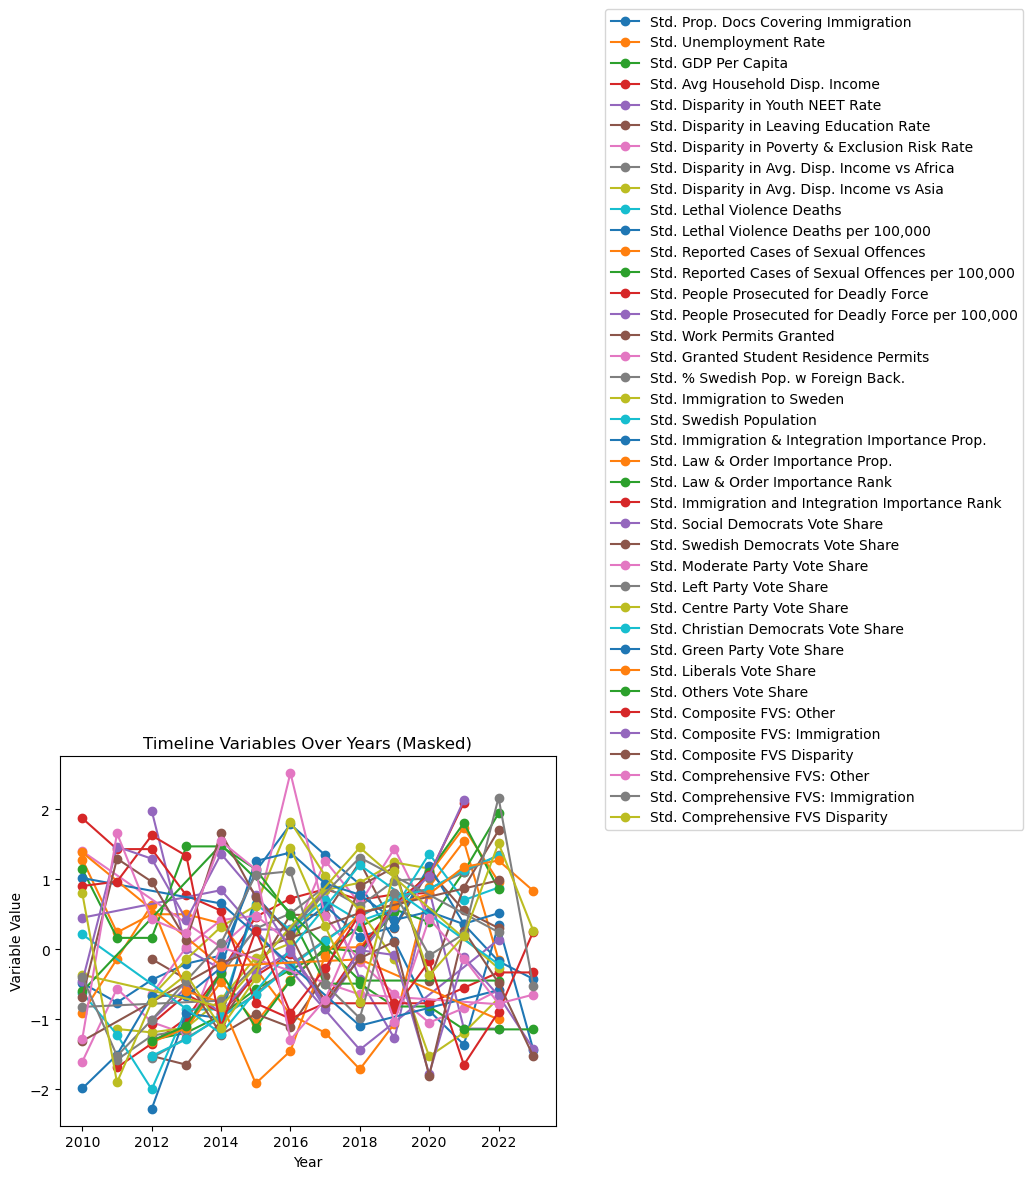

In [ ]:
# Create a mask for each variable
masks = {var: np.isfinite(plotting_data[var]) for var in timeline_variables}

# Plotting the line graphs for each variable on the same plot
for var in timeline_variables:
    plt.plot(plotting_data['Year'][masks[var]], plotting_data[var][masks[var]], marker='o', label=var)

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Variable Value')
plt.title('Timeline Variables Over Years (Masked)')

# Move the legend to the specified location
plt.legend(loc=(1.1, 0.8))

# Show the plot
plt.show()

# Unstandardized Line Plots

### Separate Columns for Plotting

In [ ]:
# Identify Quantitative Context Variables
independent_quantitative_variables = [
    'Prop. Docs Covering Immigration',
    'Unemployment Rate',
    'GDP Per Capita',
    'Avg Household Disp. Income',
    'Disparity in Youth NEET Rate',
    'Disparity in Leaving Education Rate',
    'Disparity in Poverty & Exclusion Risk Rate',
    'Disparity in Avg. Disp. Income vs Africa',
    'Disparity in Avg. Disp. Income vs Asia',
    'Lethal Violence Deaths',
    'Lethal Violence Deaths per 100,000',
    'Reported Cases of Sexual Offences',
    'Reported Cases of Sexual Offences per 100,000',
    'People Prosecuted for Deadly Force', 
    'People Prosecuted for Deadly Force per 100,000',
    'Work Permits Granted',
    'Granted Student Residence Permits', 
    '% Swedish Pop. w Foreign Back.',
    'Immigration to Sweden', 'Swedish Population',
    'Immigration & Integration Importance Prop.',
    'Law & Order Importance Prop.',
    'Law & Order Importance Rank',
    'Immigration and Integration Importance Rank',
    'Social Democrats Vote Share',
    'Swedish Democrats Vote Share',
    'Moderate Party Vote Share',
    'Left Party Vote Share',
    'Centre Party Vote Share',
    'Christian Democrats Vote Share',
    'Green Party Vote Share',
    'Liberals Vote Share',
    'Others Vote Share'
]

In [ ]:
# Identify Dependent FVS Variables
composite_variables = [
       'Composite FVS: Other',
       'Composite FVS: Immigration',
       'Composite FVS Disparity'

]

comprehensive_variables = [
       'Comprehensive FVS: Other',
       'Comprehensive FVS: Immigration',
       'Comprehensive FVS Disparity'
]

### Plot Composite Data Against Context Variables

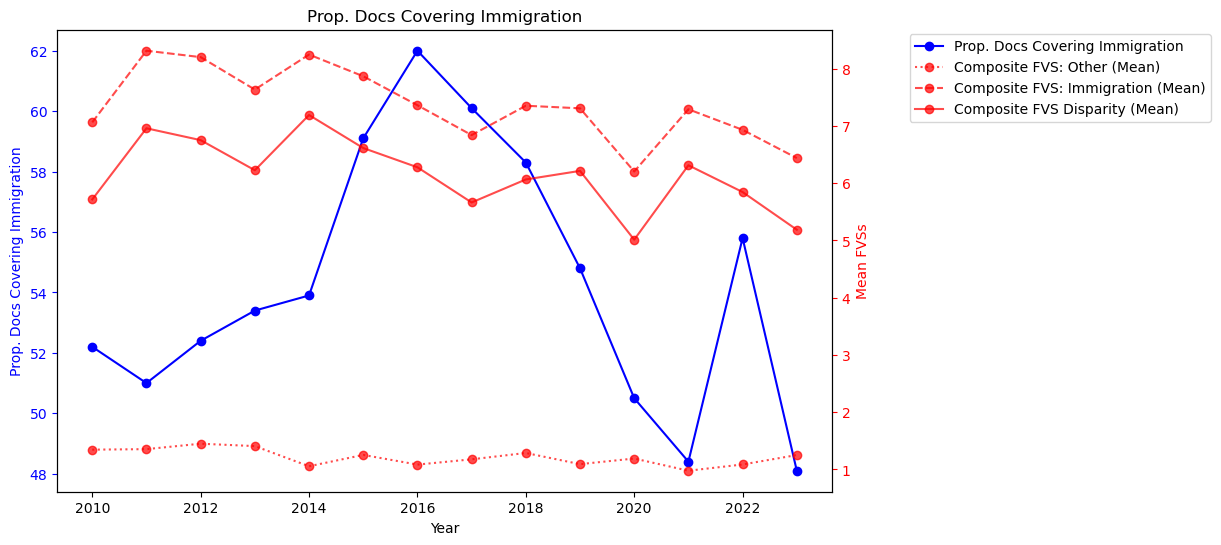

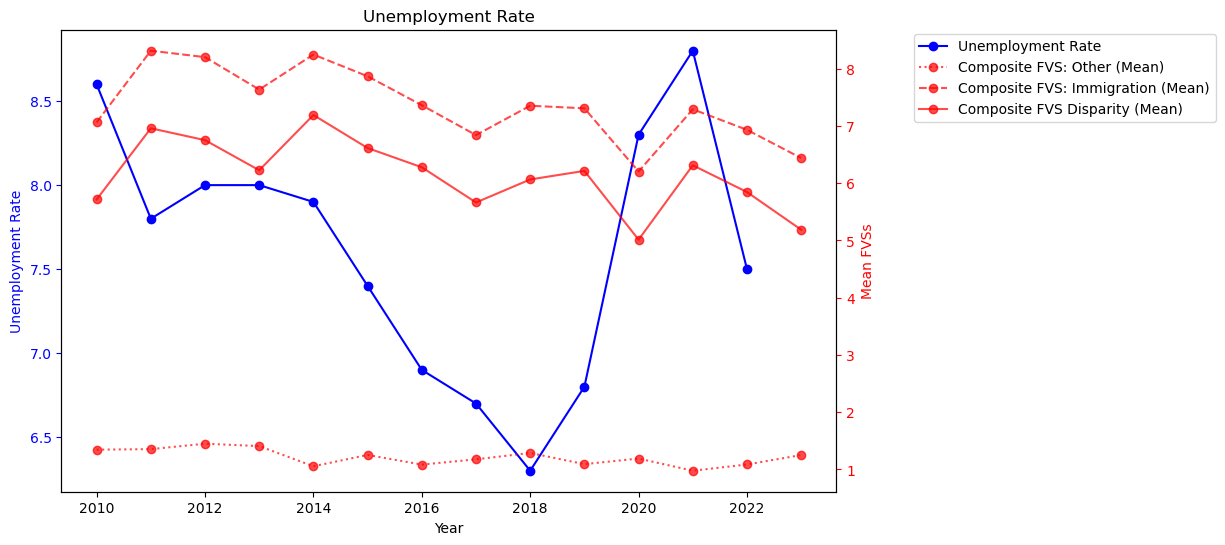

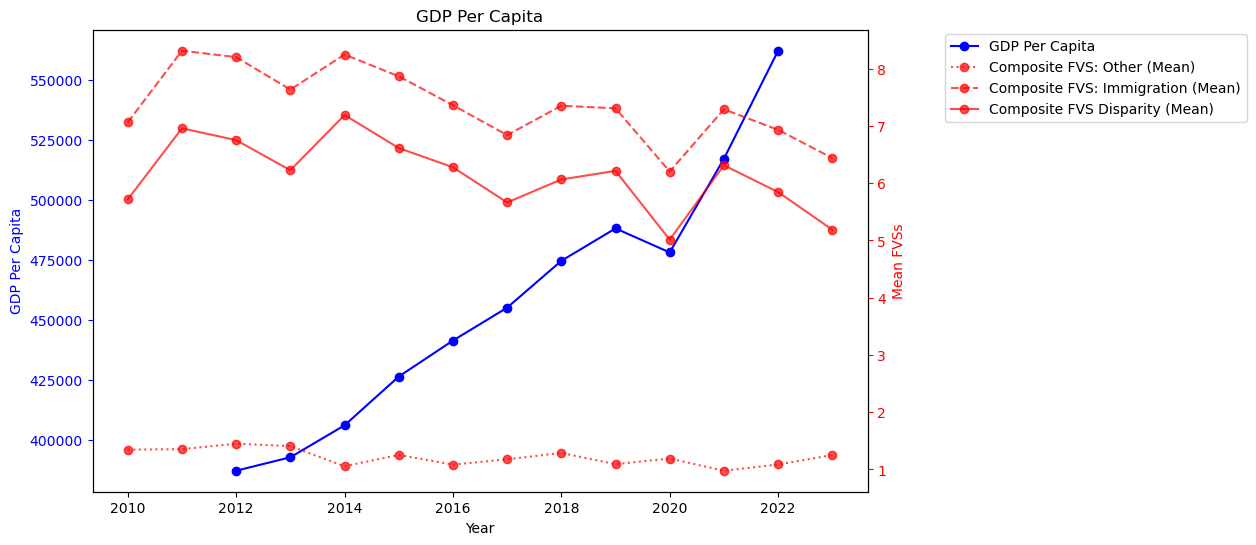

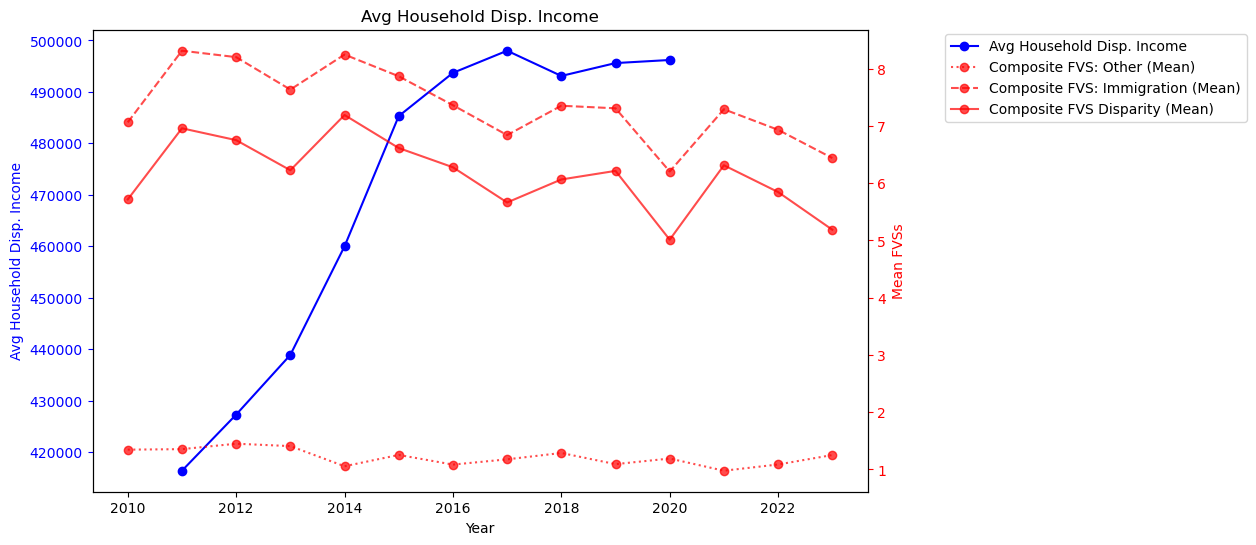

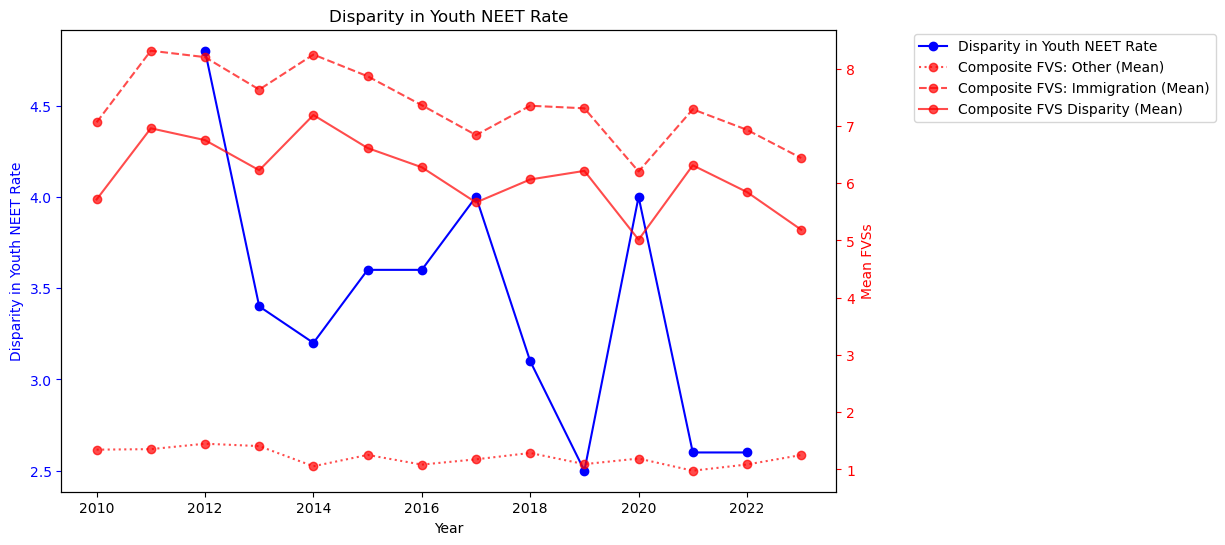

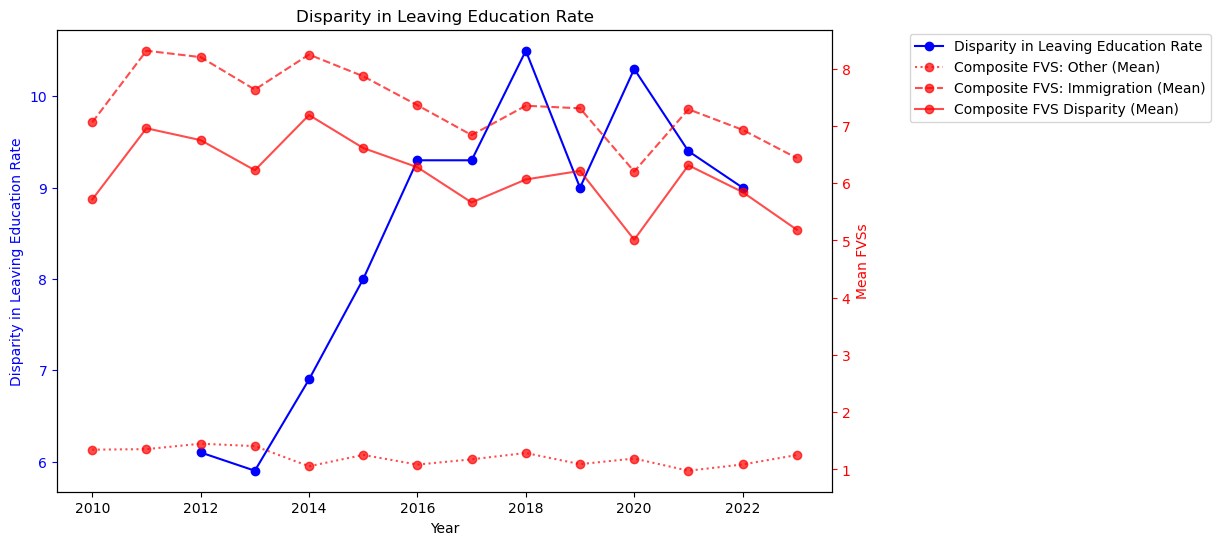

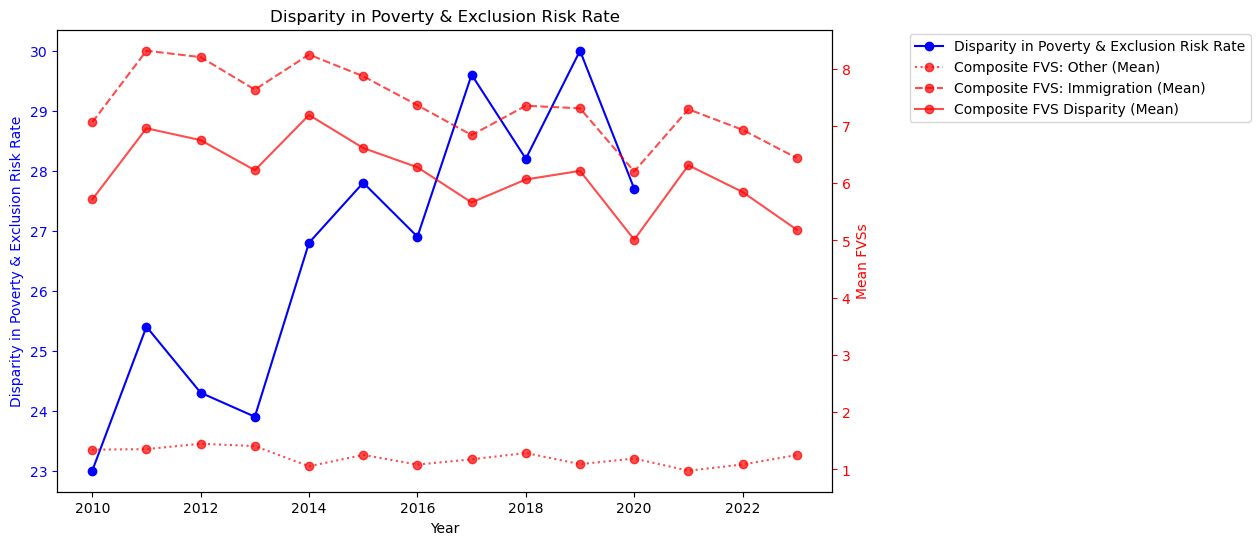

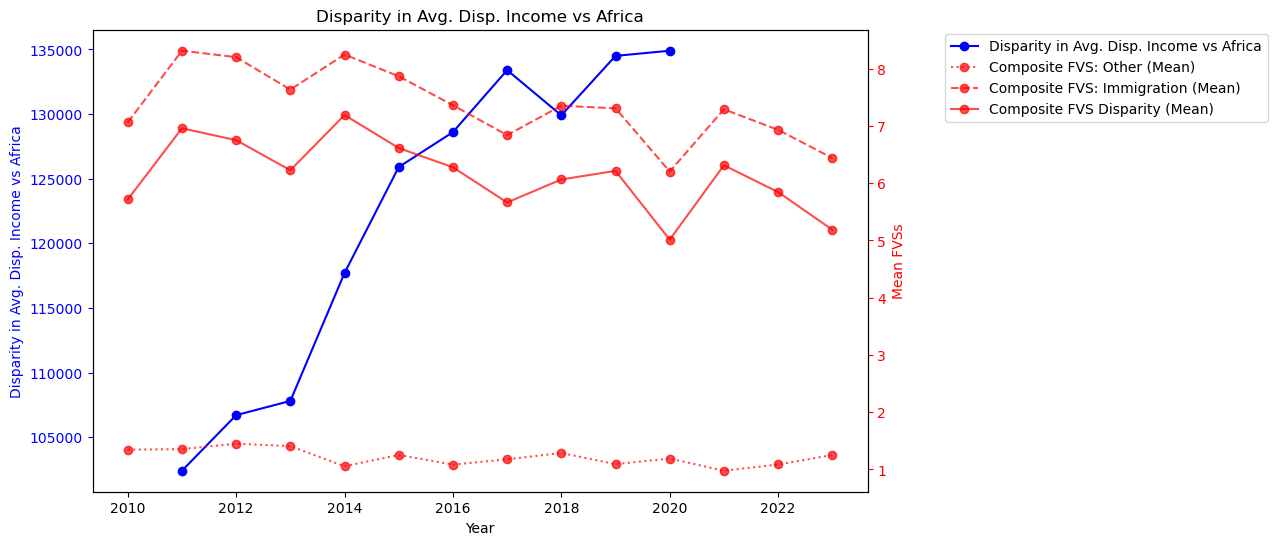

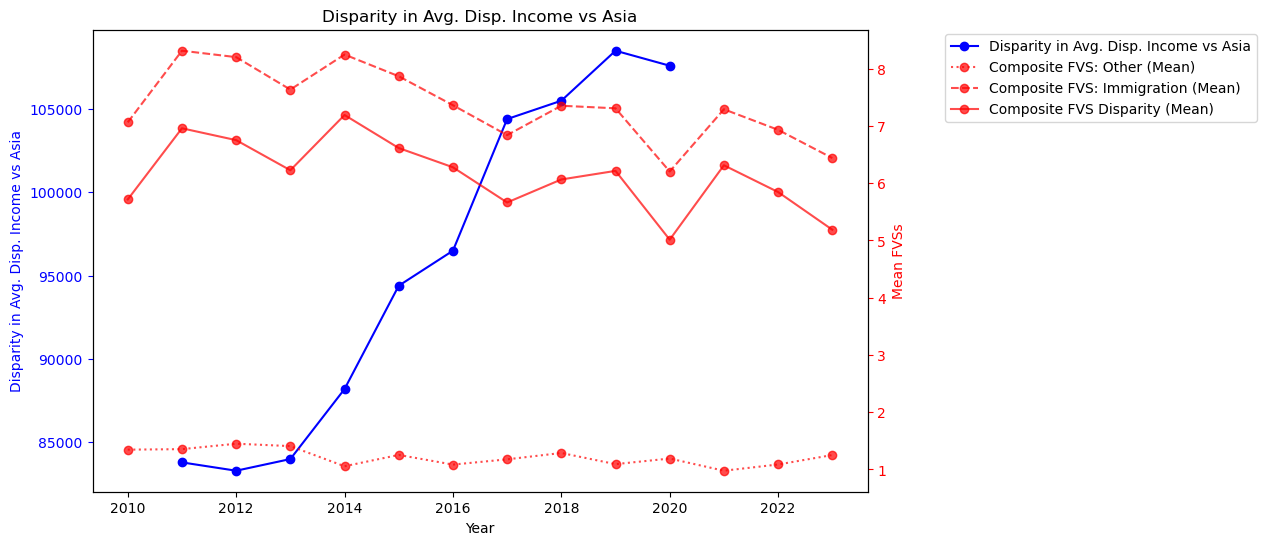

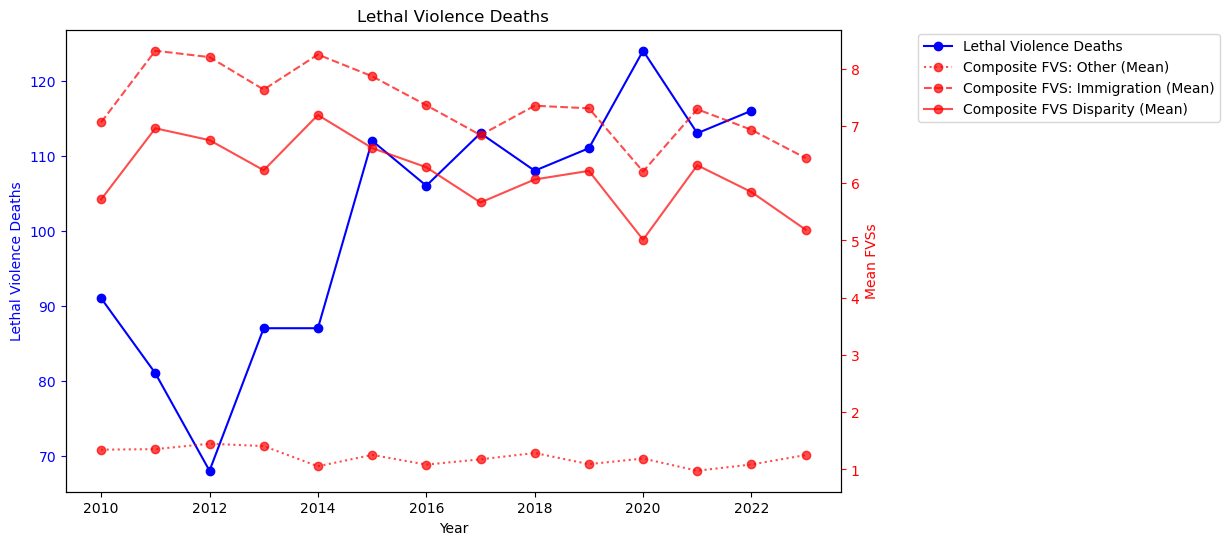

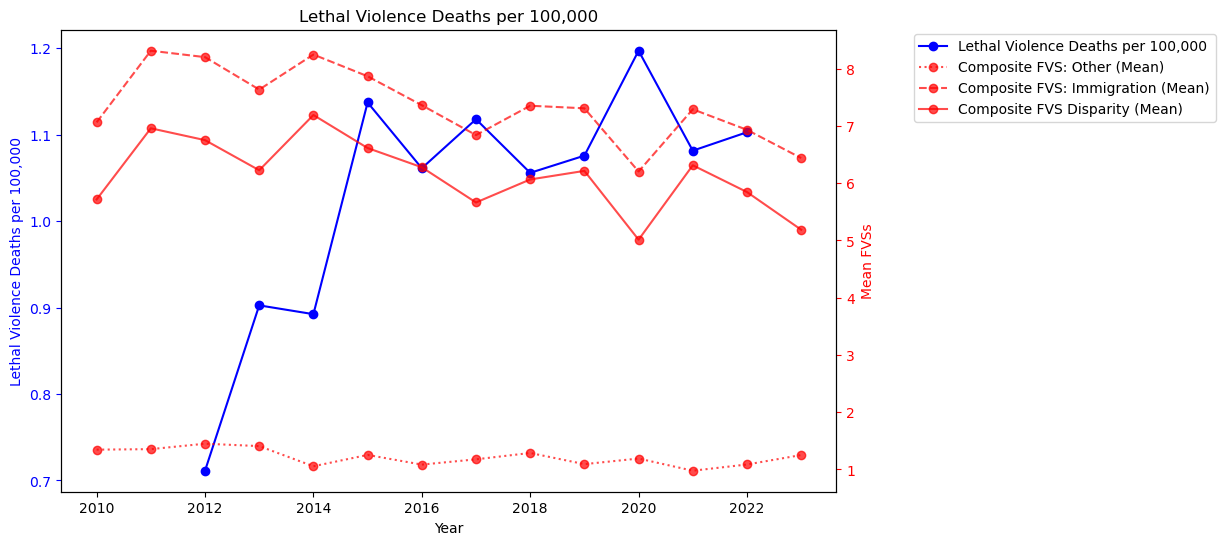

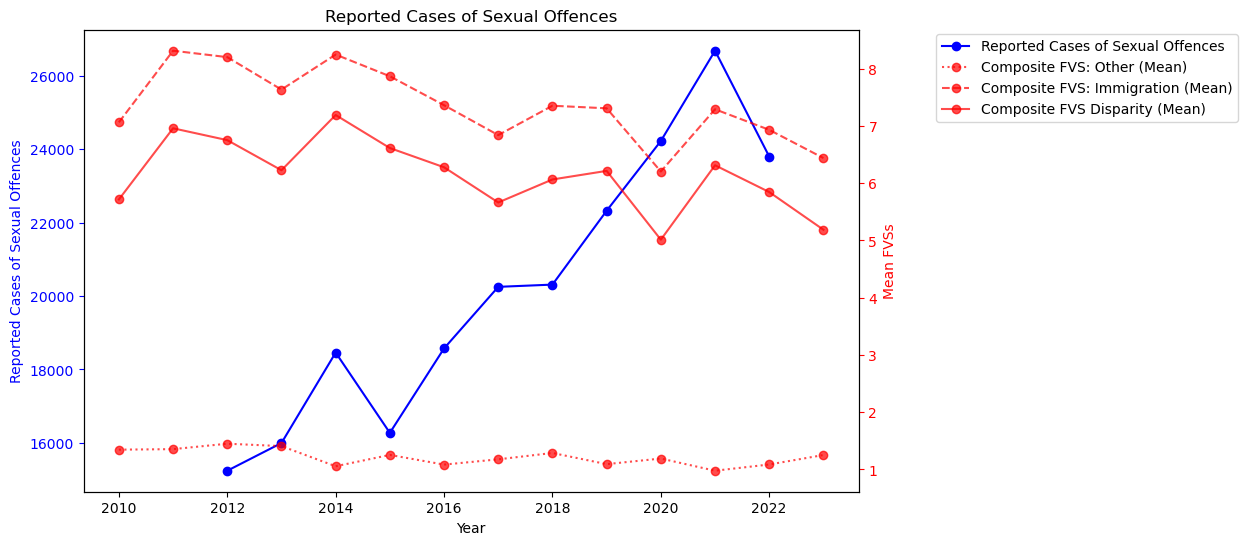

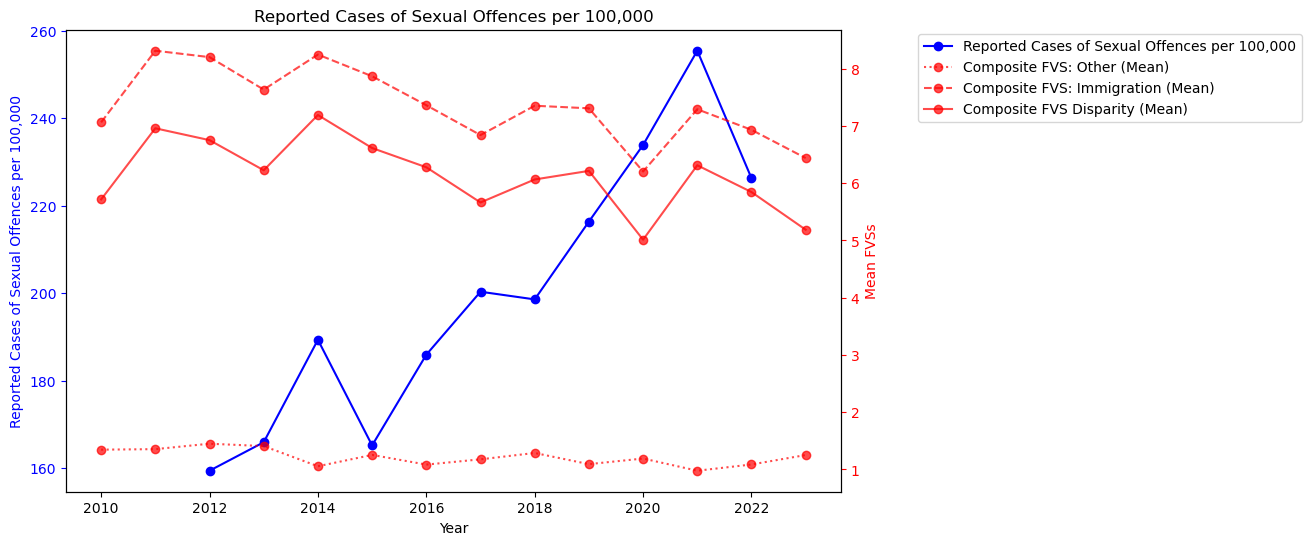

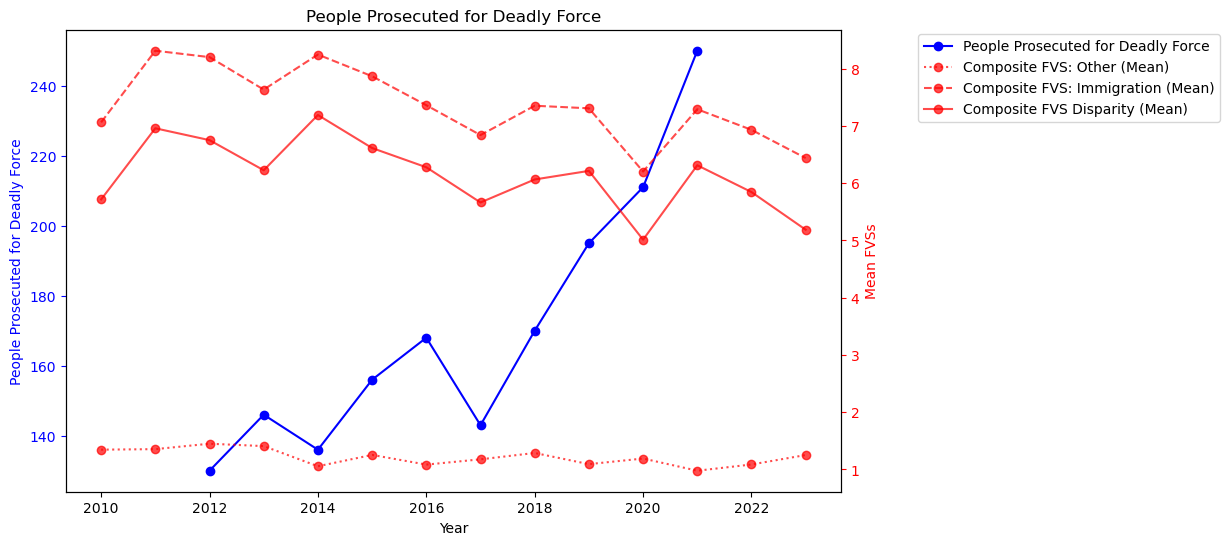

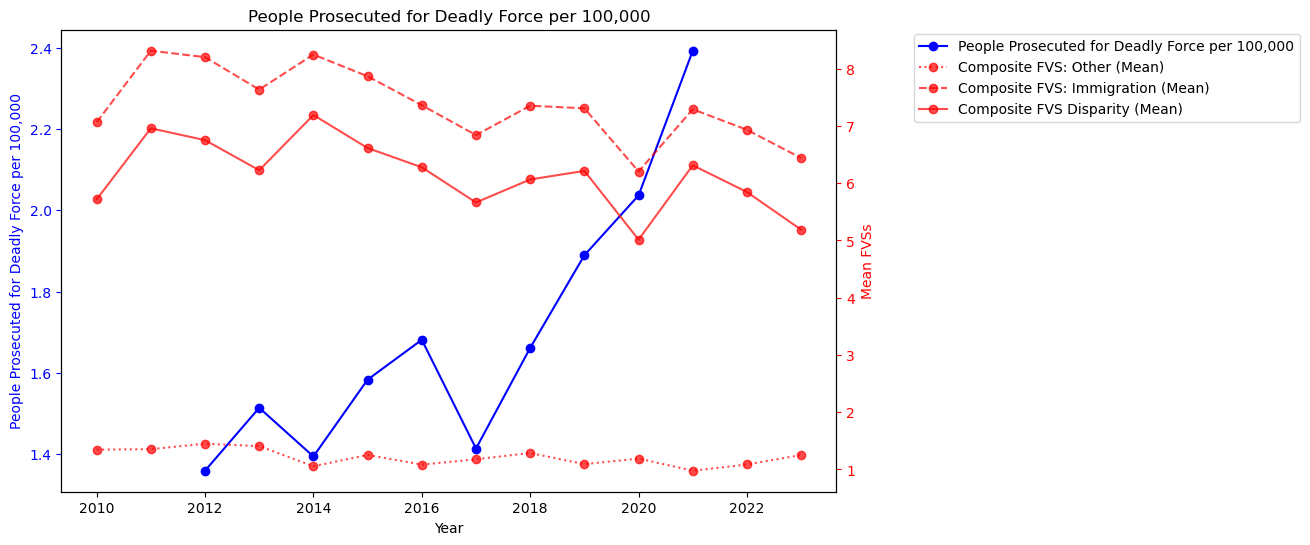

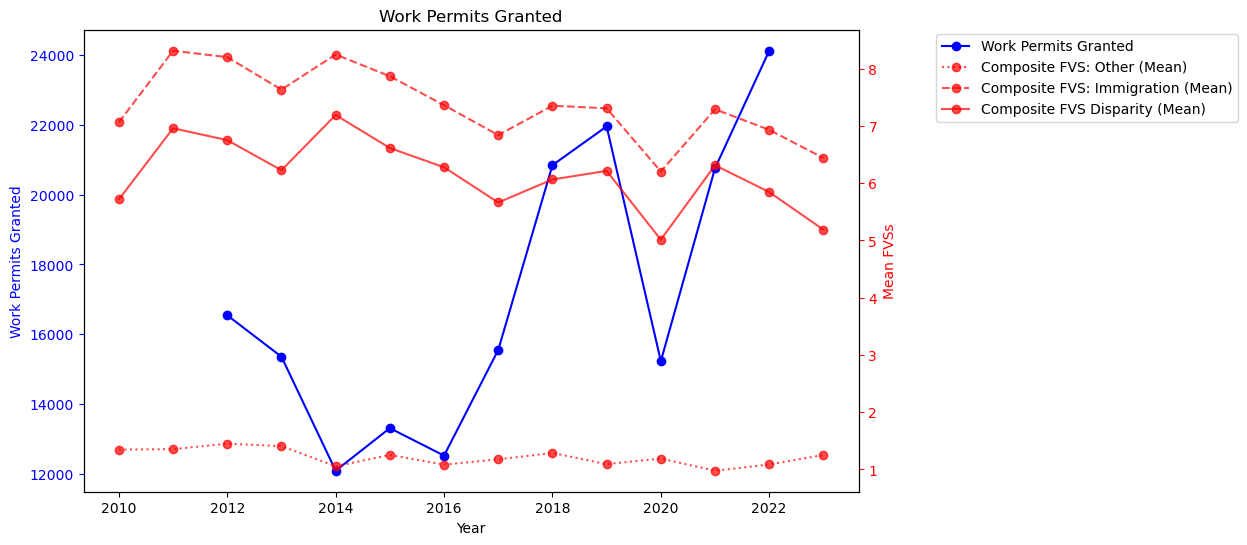

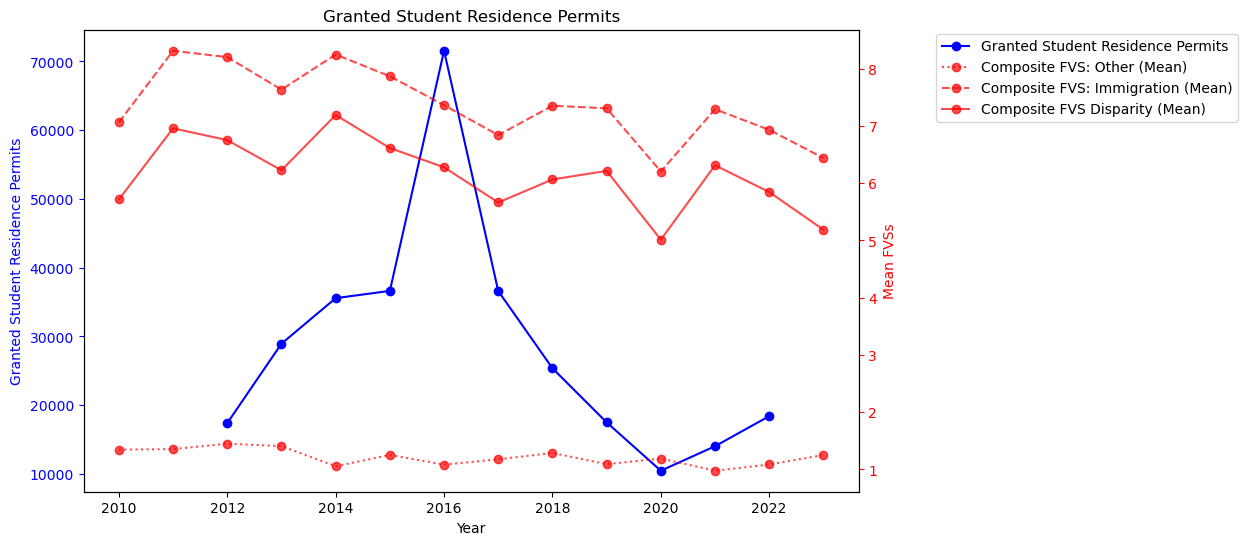

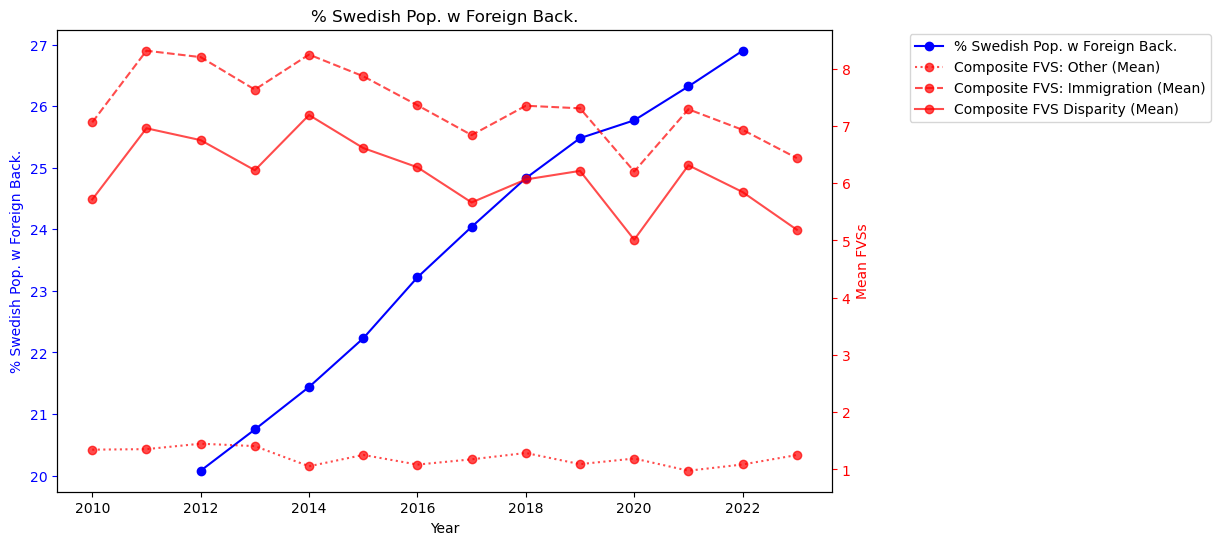

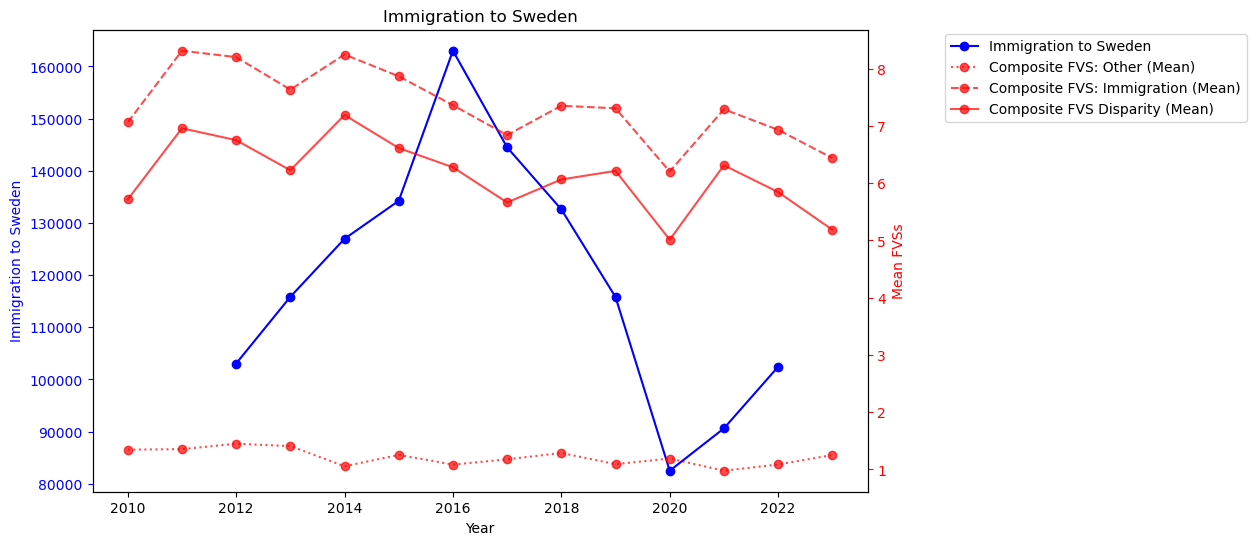

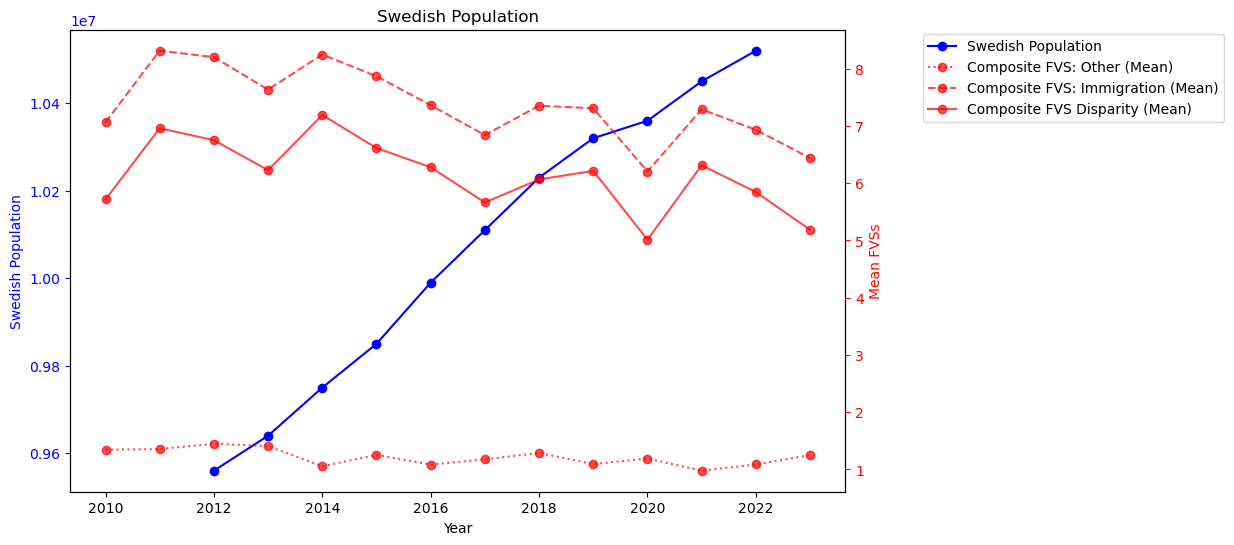

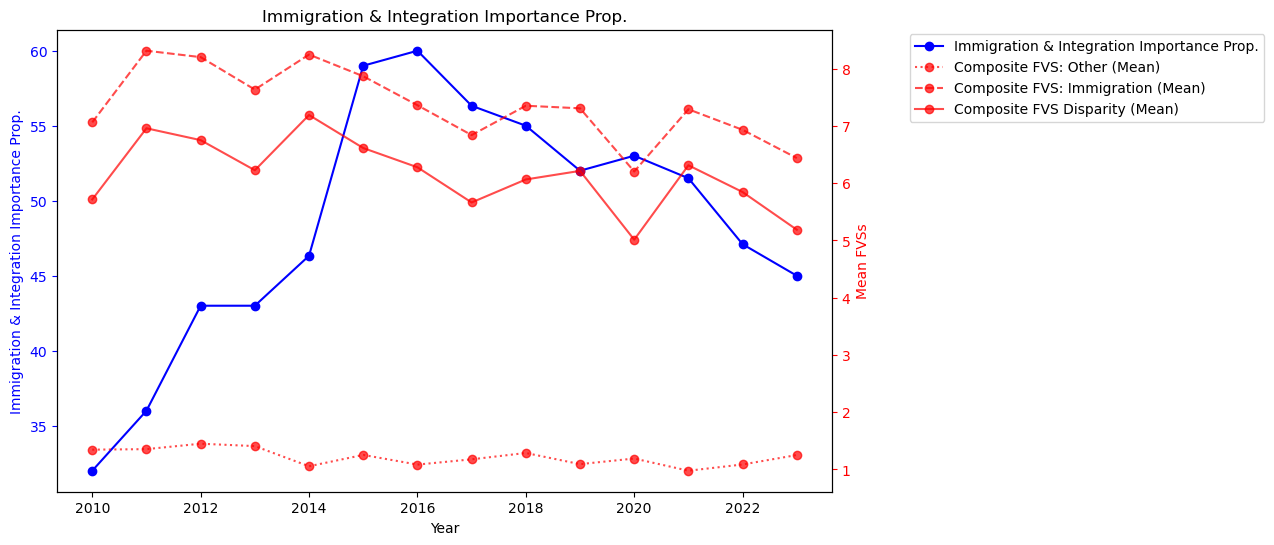

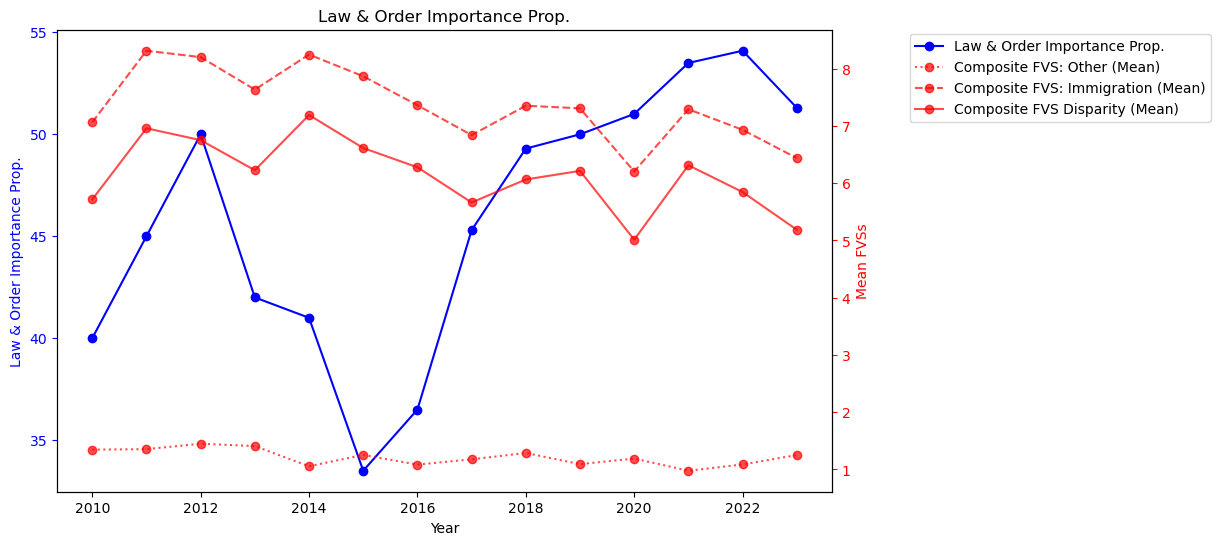

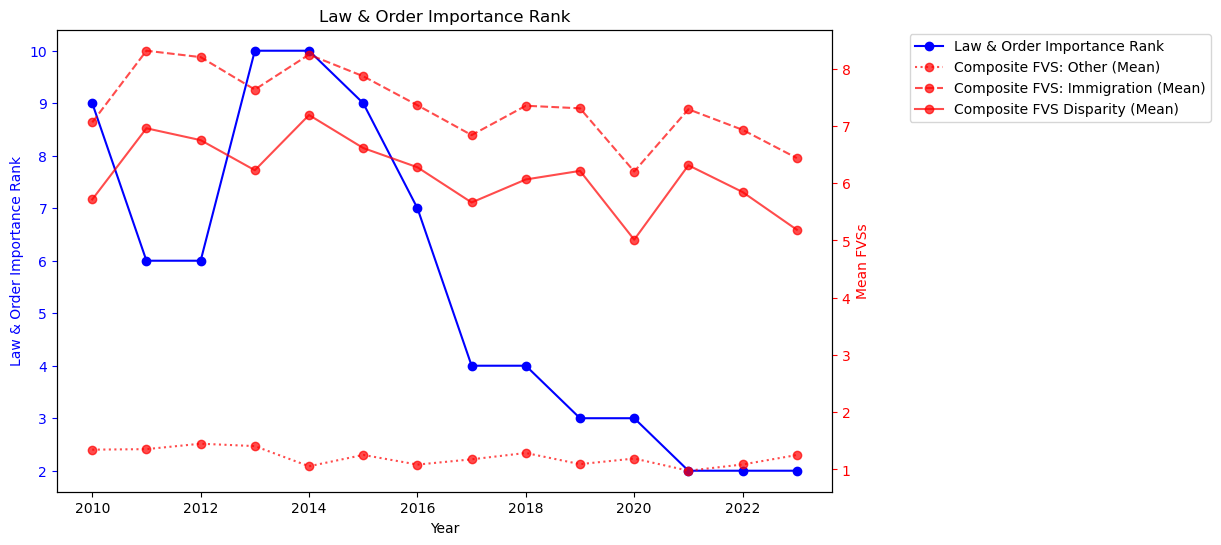

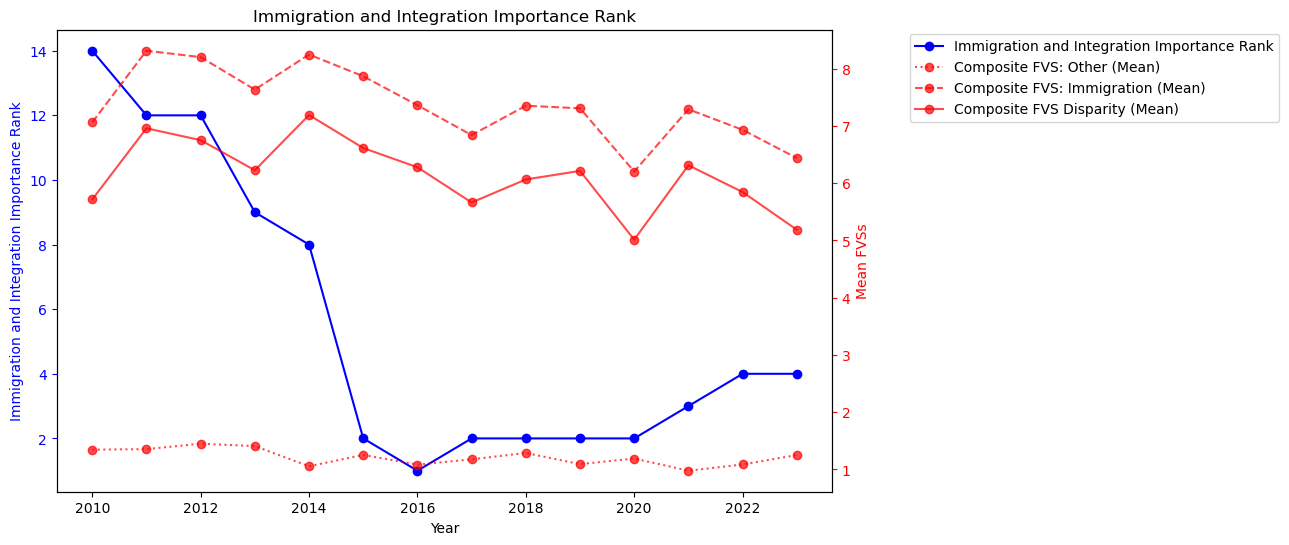

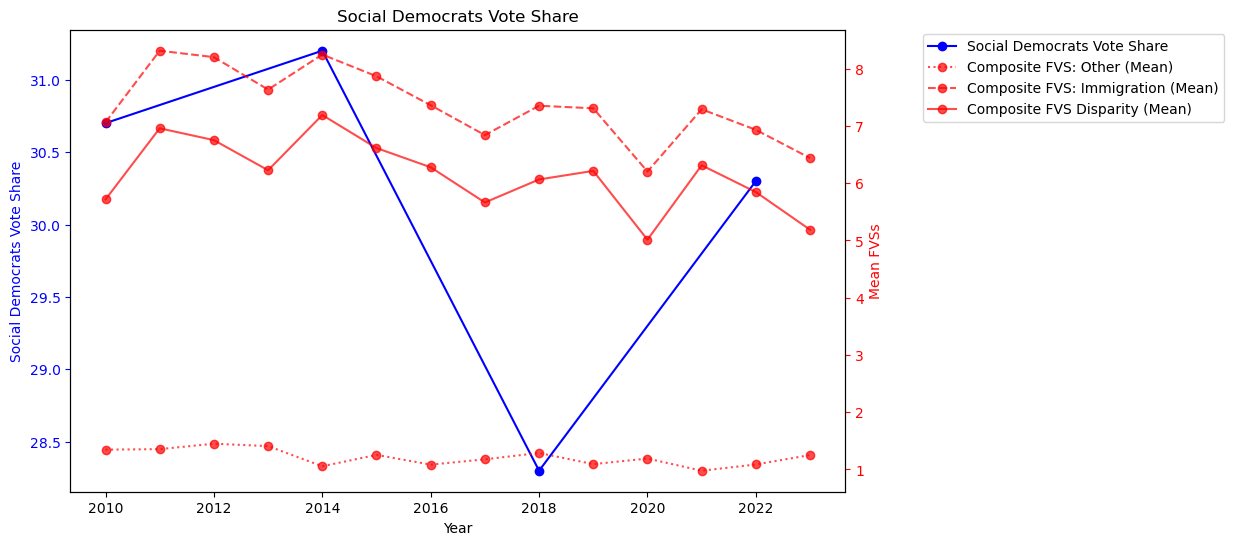

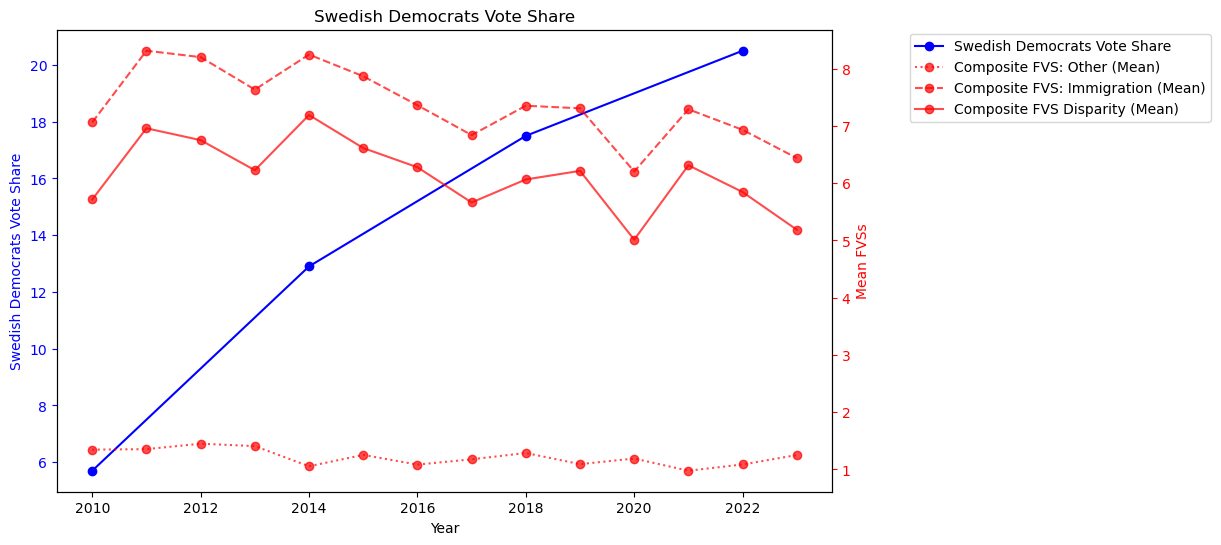

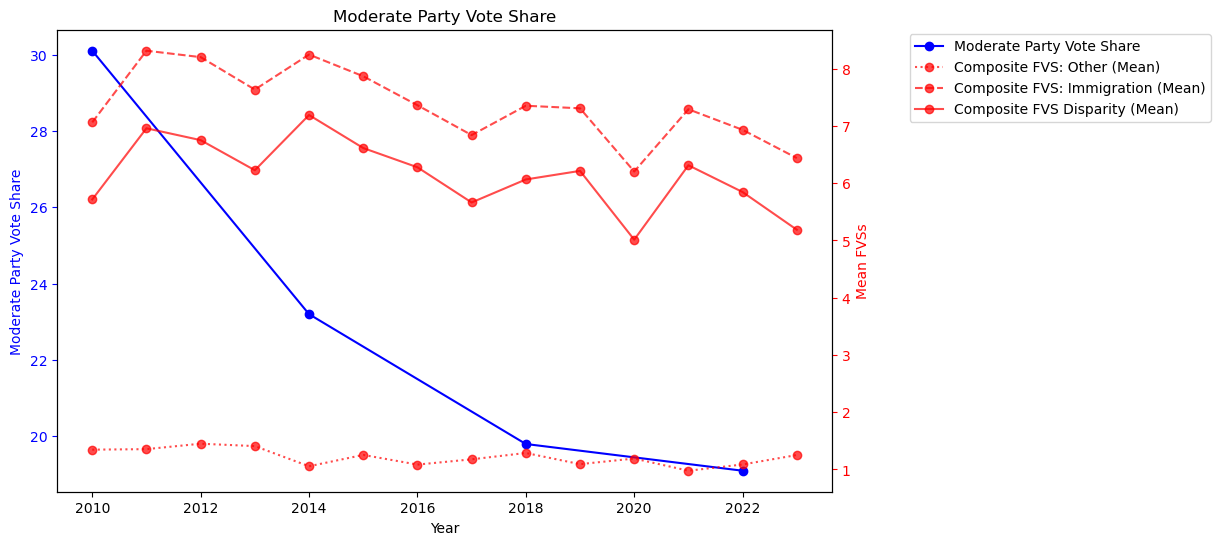

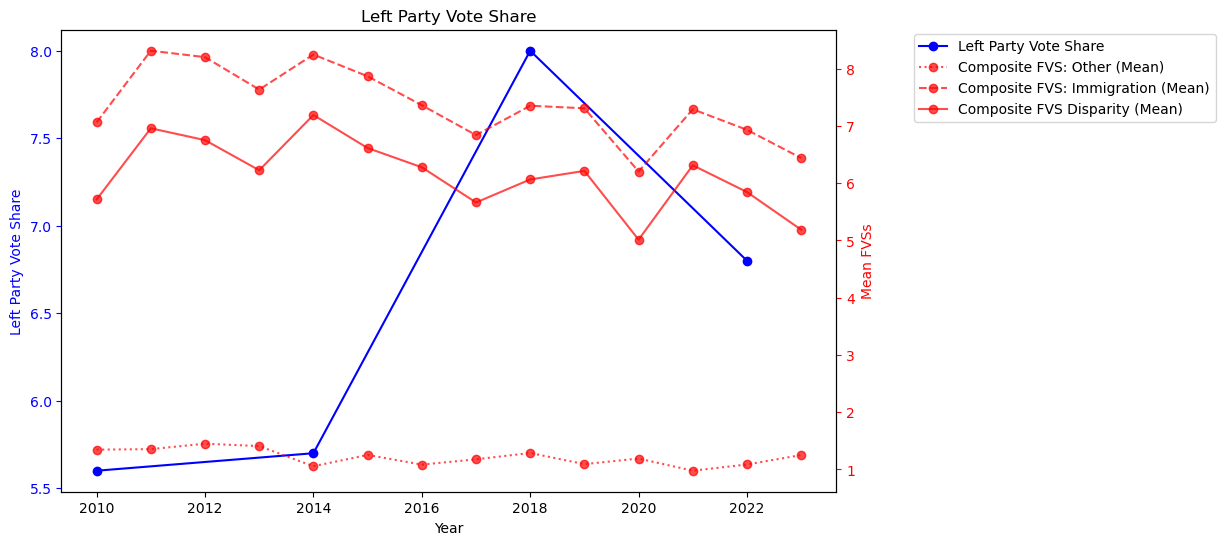

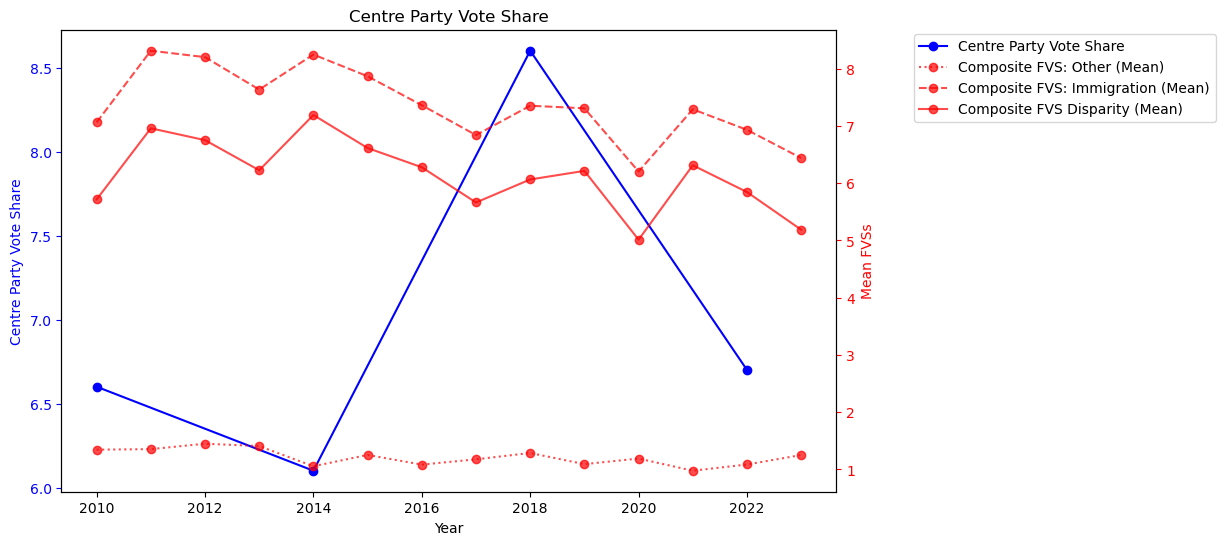

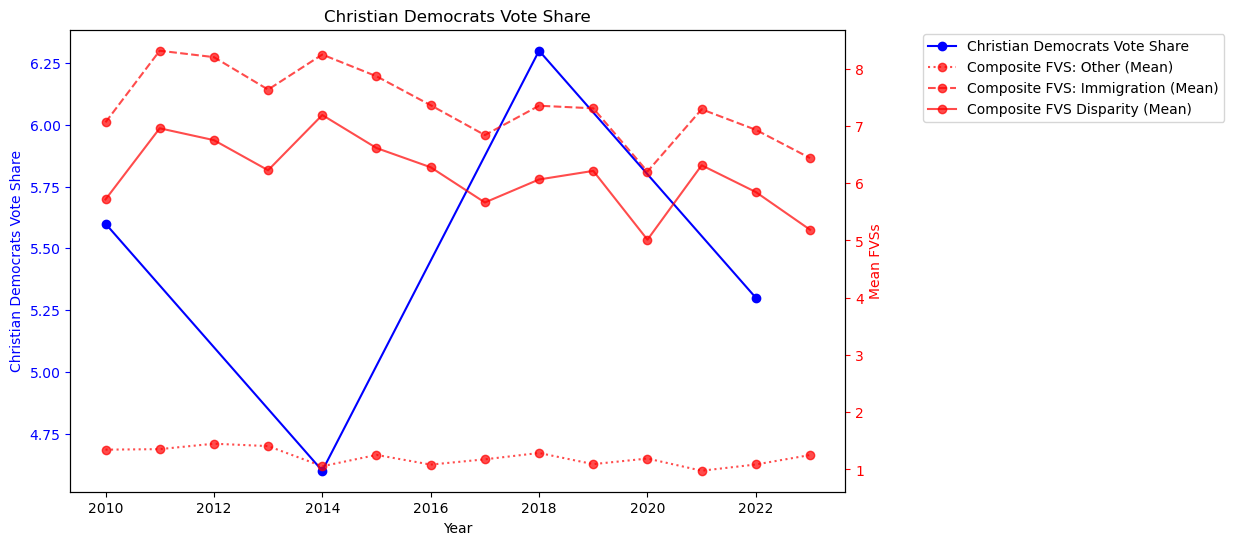

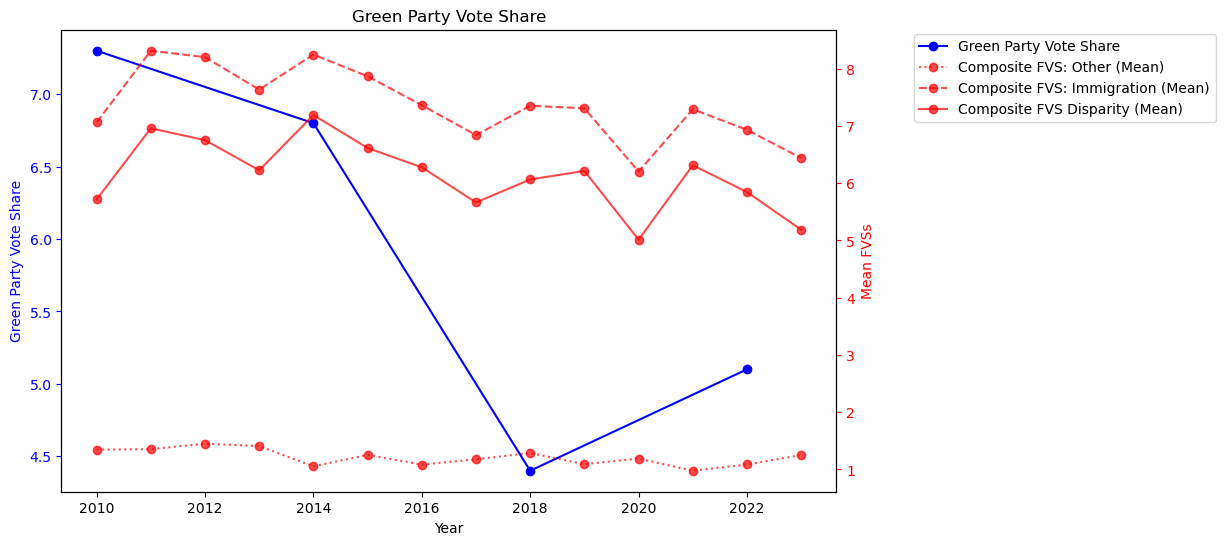

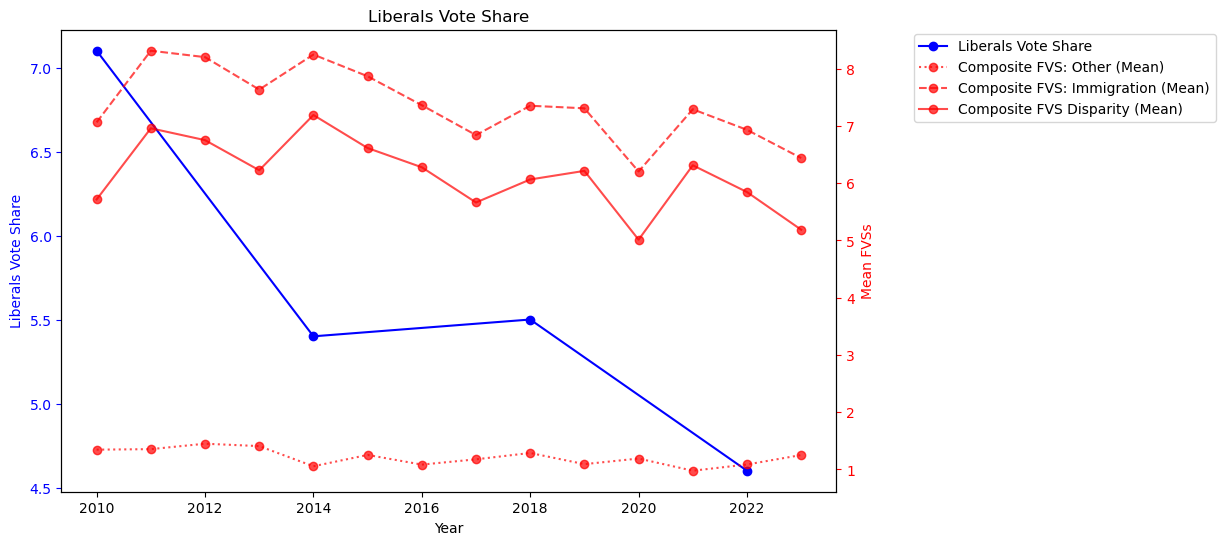

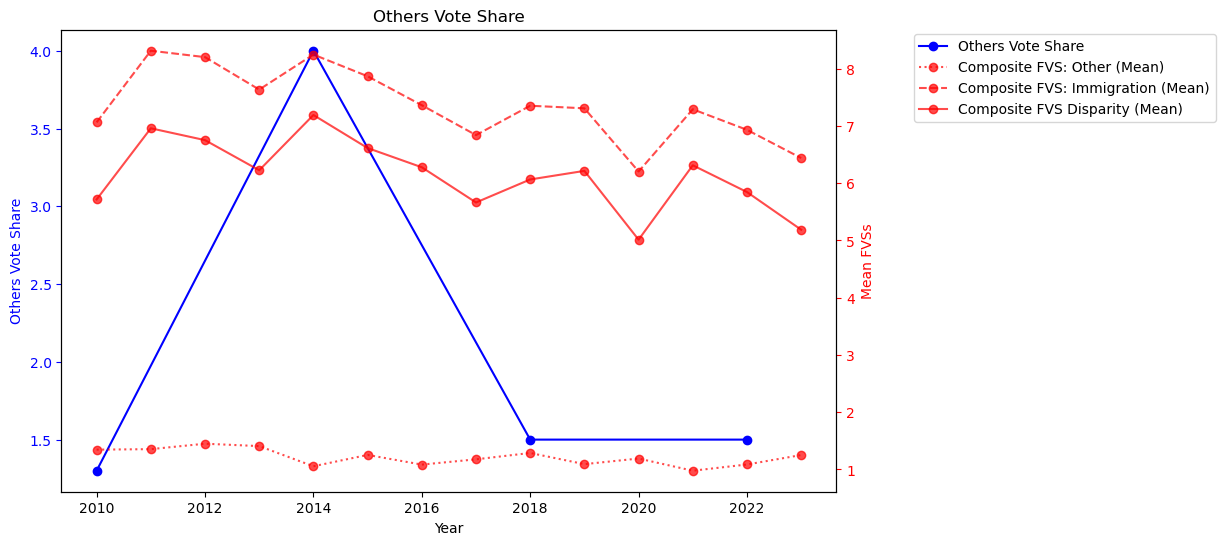

In [ ]:
for column in independent_quantitative_variables:
    plt.figure(figsize=(10, 6))
    
    # Create masks for the current column
    y_values = plotting_data[column]
    y_mask = np.isfinite(y_values)
    
    # Create the first y-axis for independent_quantitative_variables
    ax1 = plt.subplot()
    ax1.plot(plotting_data['Year'][y_mask], y_values[y_mask], label=column, marker='o', linestyle='-', color='b')
    ax1.set_xlabel('Year')
    ax1.set_ylabel(column, color='b')
    ax1.tick_params('y', colors='b')
    
    # Create the second y-axis for composite_variables
    ax2 = ax1.twinx()
    line_styles = [':', '--', '-']  # Different line styles for composite_variables
    
    for i, mean_column in enumerate(composite_variables):
        mean_values = plotting_data[mean_column]
        mean_mask = np.isfinite(mean_values)
        ax2.plot(plotting_data['Year'][mean_mask], mean_values[mean_mask], marker='o', label=f'{mean_column} (Mean)', linestyle=line_styles[i], color='r', alpha=0.7)
    
    ax2.set_ylabel('Mean FVSs', color='r')
    ax2.tick_params('y', colors='r')

    # Combine legends from both axes and move it outside the plot
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines + lines2, labels + labels2, loc=(1.1, .8))

    plt.title(column)
    plt.show()


# T-Tests

### Keyword Frequency

In [ ]:
# Group by 'Year' and calculate the proportion of rows with 'Keyword Present' == 1 for each group
proportions_by_year = data_classified.groupby('Year')['Keyword Present'].mean()

# Display the table of proportions by year
print("Proportions by Year:")
print(proportions_by_year)

# Calculate the proportions for the two groups of years: 2012-2015 and 2016-2023
group_1 = data_classified[data_classified['Year'].between(2012, 2015)]['Keyword Present']
group_2 = data_classified[data_classified['Year'].between(2016, 2023)]['Keyword Present']

# Perform t-test
t_stat, p_value = ttest_ind(group_1, group_2, equal_var=False)

# Calculate the degrees of freedom
df = len(group_1) + len(group_2) - 2

# Calculate means
mean_group_1 = group_1.mean()
mean_group_2 = group_2.mean()

# Display the results
print("\nComparison of Proportions between 2012-2015 and 2016-2023:")
print(f"Group 1 (2012-2015) Mean: {mean_group_1:.4f}")
print(f"Group 2 (2016-2023) Mean: {mean_group_2:.4f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {df}")

# Check if the result is statistically significant
alpha = 0.05
if p_value < alpha:
    print("The difference in proportions is statistically significant.")
else:
    print("The difference in proportions is not statistically significant.")

Proportions by Year:
Year
2010    0.522305
2011    0.509759
2012    0.523926
2013    0.534137
2014    0.538690
2015    0.590791
2016    0.620444
2017    0.600697
2018    0.582596
2019    0.548198
2020    0.505431
2021    0.483592
2022    0.557680
2023    0.480929
Name: Keyword Present, dtype: float64

Comparison of Proportions between 2012-2015 and 2016-2023:
Group 1 (2012-2015) Mean: 0.5496
Group 2 (2016-2023) Mean: 0.5454
T-statistic: 0.4595
P-value: 0.6459
Degrees of Freedom: 15343
The difference in proportions is not statistically significant.


In [ ]:
# Assuming 'data_classified' is your DataFrame

# Calculate the proportion of rows with 'Keyword Present' == 1
proportion_keyword_present = data_classified['Keyword Present'].mean()

# Perform one-sample t-test
t_stat, p_value = ttest_1samp(data_classified['Keyword Present'], 0.5)  # Assuming 0.5 as the null hypothesis proportion

# Calculate the degrees of freedom
df = len(data_classified['Keyword Present']) - 1

# Display the results
print("Proportion of Rows with Keyword Present == 1:")
print(f"Proportion: {proportion_keyword_present:.4f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {df}")

# Check if the result is statistically significant
alpha = 0.05
if p_value < alpha:
    print("The proportion is significantly different from 0.5.")
else:
    print("The proportion is not significantly different from 0.5.")

Proportion of Rows with Keyword Present == 1:
Proportion: 0.5431
T-statistic: 11.3882
P-value: 0.0000
Degrees of Freedom: 17291
The proportion is significantly different from 0.5.


### FVS Over the Whole Decade

In [ ]:
# Filter data for years 2012 and beyond
data_classified_2012_onwards = data_classified[data_classified['Year'] >= 2012]

# Extract data for 'Composite FVS' for each group
other_group_composite = data_classified_2012_onwards[data_classified_2012_onwards['Keyword Present'] == 0]['Composite FVS']
immigration_related_group_composite = data_classified_2012_onwards[data_classified_2012_onwards['Keyword Present'] == 1]['Composite FVS']

# Extract data for 'Comprehensive FVS' for each group
other_group_comprehensive = data_classified_2012_onwards[data_classified_2012_onwards['Keyword Present'] == 0]['Comprehensive FVS']
immigration_related_group_comprehensive = data_classified_2012_onwards[data_classified_2012_onwards['Keyword Present'] == 1]['Comprehensive FVS']

# Perform t-test and print results for 'Composite FVS'
t_stat_composite, p_value_composite = ttest_ind(other_group_composite, immigration_related_group_composite, equal_var=False, nan_policy='omit')

# Calculate averages for each group for 'Composite FVS'
avg_other_group_composite = other_group_composite.mean()
avg_immigration_related_group_composite = immigration_related_group_composite.mean()
mean_difference_composite = avg_immigration_related_group_composite - avg_other_group_composite

# Degrees of freedom for 'Composite FVS'
dof_composite = len(other_group_composite) + len(immigration_related_group_composite) - 2

# Perform t-test and print results for 'Comprehensive FVS'
t_stat_comprehensive, p_value_comprehensive = ttest_ind(other_group_comprehensive, immigration_related_group_comprehensive, equal_var=False, nan_policy='omit')

# Calculate averages for each group for 'Comprehensive FVS'
avg_other_group_comprehensive = other_group_comprehensive.mean()
avg_immigration_related_group_comprehensive = immigration_related_group_comprehensive.mean()
mean_difference_comprehensive = avg_immigration_related_group_comprehensive - avg_other_group_comprehensive

# Degrees of freedom for 'Comprehensive FVS'
dof_comprehensive = len(other_group_comprehensive) + len(immigration_related_group_comprehensive) - 2

# Print results for 'Composite FVS'
print("T-test for 'Composite FVS' between Keyword Present groups:")
print(f"  - 'Other' group average: {avg_other_group_composite:.2f}")
print(f"  - 'Immigration-related' group average: {avg_immigration_related_group_composite:.2f}")
print(f"  - Difference in means: {mean_difference_composite:.2f}")
print(f"  - T-statistic: {t_stat_composite:.4f}")
print(f"  - P-value: {p_value_composite:.4f}")
print(f"  - Degrees of Freedom: {dof_composite}")
print("\n")

# Print results for 'Comprehensive FVS'
print("T-test for 'Comprehensive FVS' between Keyword Present groups:")
print(f"  - 'Other' group average: {avg_other_group_comprehensive:.2f}")
print(f"  - 'Immigration-related' group average: {avg_immigration_related_group_comprehensive:.2f}")
print(f"  - Difference in means: {mean_difference_comprehensive:.2f}")
print(f"  - T-statistic: {t_stat_comprehensive:.4f}")
print(f"  - P-value: {p_value_comprehensive:.4f}")
print(f"  - Degrees of Freedom: {dof_comprehensive}")

T-test for 'Composite FVS' between Keyword Present groups:
  - 'Other' group average: 1.17
  - 'Immigration-related' group average: 7.24
  - Difference in means: 6.06
  - T-statistic: -59.3102
  - P-value: 0.0000
  - Degrees of Freedom: 15343


T-test for 'Comprehensive FVS' between Keyword Present groups:
  - 'Other' group average: 0.90
  - 'Immigration-related' group average: 0.99
  - Difference in means: 0.08
  - T-statistic: -5.1440
  - P-value: 0.0000
  - Degrees of Freedom: 15343


### Composite FVS in the Two Year Groups

In [ ]:
# Extract data for 'Composite FVS' for each group and 'Year' in [2012, 2015]
other_group_composite_2012_2015 = data_classified[(data_classified['Keyword Present'] == 0) & (data_classified['Year'].isin([2012, 2015]))]['Composite FVS']
immigration_related_group_composite_2012_2015 = data_classified[(data_classified['Keyword Present'] == 1) & (data_classified['Year'].isin([2012, 2015]))]['Composite FVS']

# Extract data for 'Composite FVS' for each group and 'Year' in [2016, 2023]
other_group_composite_2016_onwards = data_classified[(data_classified['Keyword Present'] == 0) & (data_classified['Year'] >= 2016)]['Composite FVS']
immigration_related_group_composite_2016_2023 = data_classified[(data_classified['Keyword Present'] == 1) & (data_classified['Year'].between(2016, 2023))]['Composite FVS']

# Perform t-test and print results for 'Other' group - 'Year' in [2012, 2015] vs 'Year' in [2016, 2023]
t_stat_other_group, p_value_other_group = ttest_ind(other_group_composite_2012_2015, other_group_composite_2016_onwards, equal_var=False, nan_policy='omit')

# Perform t-test and print results for 'Immigration-related' group - 'Year' in [2012, 2015] vs 'Year' in [2016, 2023]
t_stat_immigration_related_group, p_value_immigration_related_group = ttest_ind(immigration_related_group_composite_2012_2015, immigration_related_group_composite_2016_2023, equal_var=False, nan_policy='omit')

# Print results for 'Other' group - 'Year' in [2012, 2015] vs 'Year' in [2016, 2023]
print("T-test for 'Other' group between 'Year' in [2012, 2015] and 'Year' in [2016, 2023]:")
print(f"  - 'Other' group average ('Year' in [2012, 2015]): {other_group_composite_2012_2015.mean():.2f}")
print(f"  - 'Other' group average ('Year' in [2016, 2023]): {other_group_composite_2016_onwards.mean():.2f}")
print(f"  - Difference in means: {(other_group_composite_2016_onwards.mean() - other_group_composite_2012_2015.mean()):.2f}")
print(f"  - T-statistic: {t_stat_other_group:.4f}")
print(f"  - P-value: {p_value_other_group:.4f}")
print(f"  - Degrees of Freedom: {len(other_group_composite_2012_2015) + len(other_group_composite_2016_onwards) - 2}")
print("\n")

# Print results for 'Immigration-related' group - 'Year' in [2012, 2015] vs 'Year' in [2016, 2023]
print("T-test for 'Immigration-related' group between 'Year' in [2012, 2015] and 'Year' in [2016, 2023]:")
print(f"  - 'Immigration-related' group average ('Year' in [2012, 2015]): {immigration_related_group_composite_2012_2015.mean():.2f}")
print(f"  - 'Immigration-related' group average ('Year' in [2016, 2023]): {immigration_related_group_composite_2016_2023.mean():.2f}")
print(f"  - Difference in means: {(immigration_related_group_composite_2016_2023.mean() - immigration_related_group_composite_2012_2015.mean()):.2f}")
print(f"  - T-statistic: {t_stat_immigration_related_group:.4f}")
print(f"  - P-value: {p_value_immigration_related_group:.4f}")
print(f"  - Degrees of Freedom: {len(immigration_related_group_composite_2012_2015) + len(immigration_related_group_composite_2016_2023) - 2}")

T-test for 'Other' group between 'Year' in [2012, 2015] and 'Year' in [2016, 2023]:
  - 'Other' group average ('Year' in [2012, 2015]): 1.34
  - 'Other' group average ('Year' in [2016, 2023]): 1.14
  - Difference in means: -0.21
  - T-statistic: 1.7990
  - P-value: 0.0723
  - Degrees of Freedom: 6028


T-test for 'Immigration-related' group between 'Year' in [2012, 2015] and 'Year' in [2016, 2023]:
  - 'Immigration-related' group average ('Year' in [2012, 2015]): 8.00
  - 'Immigration-related' group average ('Year' in [2016, 2023]): 6.98
  - Difference in means: -1.02
  - T-statistic: 3.3052
  - P-value: 0.0010
  - Degrees of Freedom: 7309


### Comprehensive FVS in the Two Year Groups

In [ ]:
# Extract data for 'Comprehensive FVS' for each group and 'Year' in [2012, 2015]
other_group_comprehensive_2012_2015 = data_classified[(data_classified['Keyword Present'] == 0) & (data_classified['Year'].isin([2012, 2015]))]['Comprehensive FVS']
immigration_related_group_comprehensive_2012_2015 = data_classified[(data_classified['Keyword Present'] == 1) & (data_classified['Year'].isin([2012, 2015]))]['Comprehensive FVS']

# Extract data for 'Comprehensive FVS' for each group and 'Year' in [2016, 2023]
other_group_comprehensive_2016_onwards = data_classified[(data_classified['Keyword Present'] == 0) & (data_classified['Year'] >= 2016)]['Comprehensive FVS']
immigration_related_group_comprehensive_2016_2023 = data_classified[(data_classified['Keyword Present'] == 1) & (data_classified['Year'].between(2016, 2023))]['Comprehensive FVS']

# Perform t-test and print results for 'Other' group - 'Year' in [2012, 2015] vs 'Year' in [2016, 2023]
t_stat_other_group_comprehensive, p_value_other_group_comprehensive = ttest_ind(other_group_comprehensive_2012_2015, other_group_comprehensive_2016_onwards, equal_var=False, nan_policy='omit')

# Perform t-test and print results for 'Immigration-related' group - 'Year' in [2012, 2015] vs 'Year' in [2016, 2023]
t_stat_immigration_related_group_comprehensive, p_value_immigration_related_group_comprehensive = ttest_ind(immigration_related_group_comprehensive_2012_2015, immigration_related_group_comprehensive_2016_2023, equal_var=False, nan_policy='omit')


# Print results for 'Other' group - 'Year' in [2012, 2015] vs 'Year' in [2016, 2023]
print("T-test for 'Other' group between 'Year' in [2012, 2015] and 'Year' in [2016, 2023] (Comprehensive FVS):")
print(f"  - 'Other' group average ('Year' in [2012, 2015]): {other_group_comprehensive_2012_2015.mean():.2f}")
print(f"  - 'Other' group average ('Year' in [2016, 2023]): {other_group_comprehensive_2016_onwards.mean():.2f}")
print(f"  - Difference in means: {(other_group_comprehensive_2016_onwards.mean() - other_group_comprehensive_2012_2015.mean()):.2f}")
print(f"  - T-statistic: {t_stat_other_group_comprehensive:.4f}")
print(f"  - P-value: {p_value_other_group_comprehensive:.4f}")
print(f"  - Degrees of Freedom: {len(other_group_comprehensive_2012_2015) + len(other_group_comprehensive_2016_onwards) - 2}")
print("\n")

# Print results for 'Immigration-related' group - 'Year' in [2012, 2015] vs 'Year' in [2016, 2023]
print("T-test for 'Immigration-related' group between 'Year' in [2012, 2015] and 'Year' in [2016, 2023] (Comprehensive FVS):")
print(f"  - 'Immigration-related' group average ('Year' in [2012, 2015]): {immigration_related_group_comprehensive_2012_2015.mean():.2f}")
print(f"  - 'Immigration-related' group average ('Year' in [2016, 2023]): {immigration_related_group_comprehensive_2016_2023.mean():.2f}")
print(f"  - Difference in means: {(immigration_related_group_comprehensive_2016_2023.mean() - immigration_related_group_comprehensive_2012_2015.mean()):.2f}")
print(f"  - T-statistic: {t_stat_immigration_related_group_comprehensive:.4f}")
print(f"  - P-value: {p_value_immigration_related_group_comprehensive:.4f}")
print(f"  - Degrees of Freedom: {len(immigration_related_group_comprehensive_2012_2015) + len(immigration_related_group_comprehensive_2016_2023) - 2}")

T-test for 'Other' group between 'Year' in [2012, 2015] and 'Year' in [2016, 2023] (Comprehensive FVS):
  - 'Other' group average ('Year' in [2012, 2015]): 0.97
  - 'Other' group average ('Year' in [2016, 2023]): 0.88
  - Difference in means: -0.09
  - T-statistic: 2.0697
  - P-value: 0.0387
  - Degrees of Freedom: 6028


T-test for 'Immigration-related' group between 'Year' in [2012, 2015] and 'Year' in [2016, 2023] (Comprehensive FVS):
  - 'Immigration-related' group average ('Year' in [2012, 2015]): 0.99
  - 'Immigration-related' group average ('Year' in [2016, 2023]): 0.99
  - Difference in means: 0.00
  - T-statistic: -0.0830
  - P-value: 0.9339
  - Degrees of Freedom: 7309


### Pre and Post-2016 Immigration Wave

In [ ]:
# Define Two Groups: 2010-2015 and 2016-2023
pre_wave = testing_data.loc[testing_data['Year'] < 2016]
post_wave = testing_data.loc[testing_data['Year'] >= 2016]

In [ ]:
# Define Columns for T-Tests
columns_to_test = ['Lethal Violence Deaths per 100,000', 'Reported Cases of Sexual Offences per 100,000', 'People Prosecuted for Deadly Force per 100,000', # Law and Order
                   'Disparity in Youth NEET Rate', 'Disparity in Leaving Education Rate', 'Disparity in Poverty & Exclusion Risk Rate', 'Disparity in Avg. Disp. Income vs Africa', 'Disparity in Avg. Disp. Income vs Asia', # Assimilation
                   'Unemployment Rate', 'GDP Per Capita', 'Avg Household Disp. Income', # Economic Controls
                   'Immigration & Integration Importance Prop.', 'Immigration and Integration Importance Rank', 'Law & Order Importance Prop.', 'Law & Order Importance Rank', # Voter Input for Issues
                   'Composite FVS: Other', 'Composite FVS: Immigration', 'Composite FVS Disparity', # Composite FVS
                   'Comprehensive FVS: Other', 'Comprehensive FVS: Immigration', 'Comprehensive FVS Disparity' # Comprehensive FVS
                   ]

In [ ]:
# Perform t-tests and print results
for column in columns_to_test:
    t_stat, p_value = ttest_ind(pre_wave[column], post_wave[column], equal_var=False, nan_policy='omit')
    
    # Calculate averages for each group
    avg_pre_wave = pre_wave[column].mean()
    avg_post_wave = post_wave[column].mean()
    
    # Calculate the difference between means
    mean_difference = avg_pre_wave - avg_post_wave
    
    # Calculate degrees of freedom
    dof = pre_wave[column].count() + post_wave[column].count() - 2
    
    # Print results
    print(f"T-test for {column}:")
    print(f"  - Pre-Wave average: {avg_pre_wave:.2f}")
    print(f"  - Post-Wave average: {avg_post_wave:.2f}")
    print(f"  - Difference between means: {mean_difference:.2f}")
    print(f"  - T-statistic: {t_stat:.4f}")
    print(f"  - P-value: {p_value:.4f}")
    
    # Print degrees of freedom
    print(f"  - Degrees of Freedom: {dof}")
    
    # Print 'Year' column min and max for each group
    print(f"  - Pre-Wave 'Year' min: {pre_wave['Year'].min()}")
    print(f"  - Pre-Wave 'Year' max: {pre_wave['Year'].max()}")
    print(f"  - Post-Wave 'Year' min: {post_wave['Year'].min()}")
    print(f"  - Post-Wave 'Year' max: {post_wave['Year'].max()}")
    
    print("\n")


T-test for Lethal Violence Deaths per 100,000:
  - Pre-Wave average: 0.91
  - Post-Wave average: 1.10
  - Difference between means: -0.19
  - T-statistic: -2.1072
  - P-value: 0.1183
  - Degrees of Freedom: 9
  - Pre-Wave 'Year' min: 2012
  - Pre-Wave 'Year' max: 2015
  - Post-Wave 'Year' min: 2016
  - Post-Wave 'Year' max: 2023


T-test for Reported Cases of Sexual Offences per 100,000:
  - Pre-Wave average: 169.97
  - Post-Wave average: 216.66
  - Difference between means: -46.70
  - T-statistic: -4.1702
  - P-value: 0.0024
  - Degrees of Freedom: 9
  - Pre-Wave 'Year' min: 2012
  - Pre-Wave 'Year' max: 2015
  - Post-Wave 'Year' min: 2016
  - Post-Wave 'Year' max: 2023


T-test for People Prosecuted for Deadly Force per 100,000:
  - Pre-Wave average: 1.46
  - Post-Wave average: 1.85
  - Difference between means: -0.38
  - T-statistic: -2.5709
  - P-value: 0.0406
  - Degrees of Freedom: 8
  - Pre-Wave 'Year' min: 2012
  - Pre-Wave 'Year' max: 2015
  - Post-Wave 'Year' min: 2016
  - Po